## Predicting and Understanding Employee Attrition 

### Overview
A common question that many employers seek to answer is how to predict attrition before it happens, and what attributes are related to attrition. We define attrition as an employee leaving the company. This includes resignations, and all other types of terminations. 

Investigating attrition can save time and money, and provide helpful insight to try and counteract attrition. 

The major questions we seek to answer: What variables or attributes are associated with attrition? Who might be expected to leave?

Because our goal is to create an analysis that can be understood and applied, we want to create a less flexible, simpler model so we can optimize for inference.
This means we will stick to a parametric approach when possible, and leverage available domain knowledge and insights to select our variables.

In order to better understand this problem, we can use logistic regression analysis and other classification methods to identify individuals who are at risk of attrition, based on characteristics of employees who have already left. 

We can also leverage p-values and other statistical methods to identify the significance of coefficient values and variables, so we can attempt to answer the question of which variables are more strongly associated with attrition.

We use classification methods like logistic regression because we want to predict a discrete class label / event, attrition or no attrition. 


In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
sn.set(rc={'figure.figsize':(6,3)})

### Dataset

I will be using a dataset from Kaggle, created by IBM data scientists for the express purpose of analyzing attrition for human capital analytics teams.
The reason I have selected this dataset is because it is clean, and does not contain any sensitive information, as actual employee data would not be available due to security concerns. 


Link to dataset: https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset

In [2]:
data = pd.read_csv("attrit_data.csv")
data.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

We can see that before we create any additional variables or extract any further features, we have 1,470 rows (or people, in this case), and 34 unique features, and one outcome variable of interest (attrition). 

We have a mix of categorical and continuous numeric values, and will need to investigate our predictors to ensure they are prepped and relevant to our analysis.

### Data Cleaning

Part of what is great about this dataset is that it does not contain any null values. 
This is because it was a dataset created intentionally for modeling and analysis. 

When working with HR data in general, there tends to be very few instances of missing values, since the databases are usually well-maintained.
This is one of the benefits of this area of analysis.

In [3]:
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

The next step in data cleaning is to make sure that each of our variables have numeric representations, so we can pass them to our model. 
The best approach for categorical variables is to use dummy variables.
Let's investigate each of our categorical variables and use dummy variables as needed.

In [4]:
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

#### Dummy Variables - Categorical Variables

<AxesSubplot:title={'center':'BusinessTravel'}>

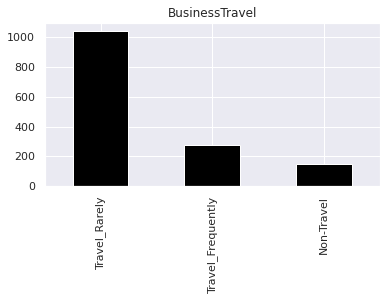

In [5]:
data['BusinessTravel'].value_counts().plot(kind='bar',title='BusinessTravel',color='black')

We can see that this needs to be changed to a dummy variable. 

We also note that we have very few individuals in the non-travel category - this may negatively impact the model if we include this variable. 

We will add all of our dummy variables at once, once we are done investigating each of them.

__EducationField__

<AxesSubplot:title={'center':'EducationField'}>

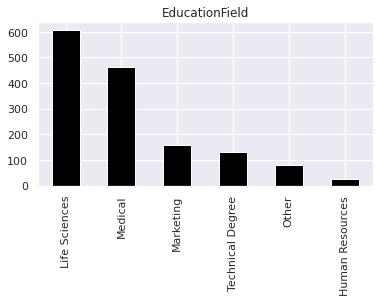

In [6]:
data['EducationField'].value_counts().plot(kind='bar',title='EducationField',color='black')

We can see that this variable needs to be encoded as a dummy variable. 
We can also see that there are very few individuals in the human resources field - this may cause issues with convergence if this variable is included in the model. 

__Gender__

<AxesSubplot:title={'center':'Gender'}>

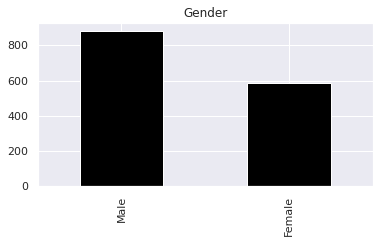

In [7]:
data['Gender'].value_counts().plot(kind='bar',title='Gender',color='black')

We can see that this variable can be encoded as a Boolean variable, if we change it to encode one gender. 

Let's encode it as male, such that GenderMale = 1 when male, GenderMale = 0 when female.

In doing so, we don't need to create a dummy variable for each gender.

In [8]:
data = data.rename(columns={'Gender':'GenderMale'})
data['GenderMale'] = data['GenderMale'].replace('Male',1)
data['GenderMale'] = data['GenderMale'].replace('Female',0)

__JobRole__

<AxesSubplot:title={'center':'JobRole'}>

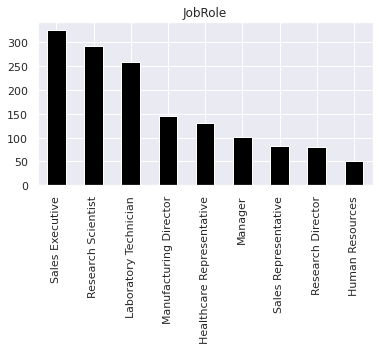

In [9]:
data['JobRole'].value_counts().plot(kind='bar',title='JobRole',color='black')

Once again, we can see that there are very few individuals in certain job roles - we may consider dropping the dummy variables that encode these job roles, as they can cause convergence issues when fitting the model. 

__MaritalStatus__

<AxesSubplot:title={'center':'MaritalStatus'}>

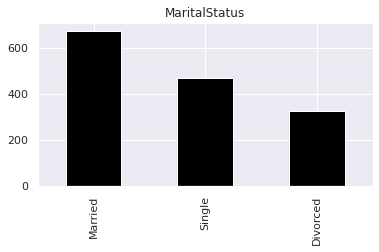

In [10]:
data['MaritalStatus'].value_counts().plot(kind='bar',title='MaritalStatus',color='black')

There is better distribution amongst these values than some of the other categorical variables we've investigated. 
This variable will need to be encoded as a dummy variable.

__Over18__

<AxesSubplot:title={'center':'Over18'}>

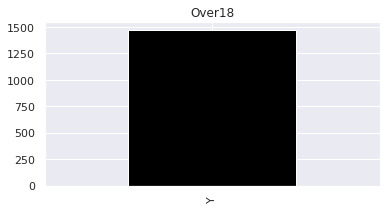

In [11]:
data['Over18'].value_counts().plot(kind='bar',title='Over18',color='black')

We can see that all of the samples have the same value for this predictor - let's drop it from the dataset, since it will not be helpful in our model. 

In [12]:
data = data.drop(['Over18'],axis=1)

__OverTime__

<AxesSubplot:title={'center':'OverTime'}>

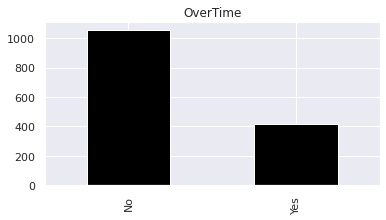

In [13]:
data['OverTime'].value_counts().plot(kind='bar',title='OverTime',color='black')

We can see that this variable can be encoded as a boolean variable.

In [14]:
data['OverTime'] = data['OverTime'].replace('Yes',1)
data['OverTime'] = data['OverTime'].replace('No',0)

__Attrition__

Finally, we want to encode our attrition variable numerically. 

<AxesSubplot:>

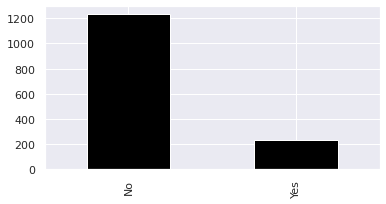

In [15]:
data['Attrition'].value_counts().plot(kind='bar',color='black')

In [16]:
data['Attrition'] = data['Attrition'].replace('Yes',1)
data['Attrition'] = data['Attrition'].replace('No',0)

__Dummy Variables__

Now that we've investigated all of our non-numerical variables, let's go ahead and create dummy variables for our dataset.

In [17]:
data = pd.get_dummies(data)
data.head()

Age  Attrition  DailyRate  DistanceFromHome  Education  EmployeeCount  \
0   41          1       1102                 1          2              1   
1   49          0        279                 8          1              1   
2   37          1       1373                 2          2              1   
3   33          0       1392                 3          4              1   
4   27          0        591                 2          1              1   

   EmployeeNumber  EnvironmentSatisfaction  GenderMale  HourlyRate  ...  \
0               1                        2           0          94  ...   
1               2                        3           1          61  ...   
2               4                        4           1          92  ...   
3               5                        4           0          56  ...   
4               7                        1           1          40  ...   

   JobRole_Laboratory Technician  JobRole_Manager  \
0                              0                0   
1                              0                0   
2                              1                0   
3                              0                0   
4                              1                0   

   JobRole_Manufacturing Director  JobRole_Research Director  \
0                               0                          0   
1                               0                          0   
2                               0                          0   
3                               0                          0   
4                               0                          0   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                           0                        1   
1                           1                        0   
2                           0                        0   
3                           1                        0   
4                           0                        0   

   JobRole_Sales Representative  MaritalStatus_Divorced  \
0                             0                       0   
1                             0                       0   
2                             0                       0   
3                             0                       0   
4                             0                       0   

   MaritalStatus_Married  MaritalStatus_Single  
0                      0                     1  
1                      1                     0  
2                      0                     1  
3                      1                     0  
4                      1                     0  

[5 rows x 53 columns]

Now we have 52 predictors and one outcome variable. 

Let's make sure all of our variables have the correct data type (numeric) so we can continue with our exploratory data analysis.

In [18]:
data.dtypes

Age                                  int64
Attrition                            int64
DailyRate                            int64
DistanceFromHome                     int64
Education                            int64
EmployeeCount                        int64
EmployeeNumber                       int64
EnvironmentSatisfaction              int64
GenderMale                           int64
HourlyRate                           int64
JobInvolvement                       int64
JobLevel                             int64
JobSatisfaction                      int64
MonthlyIncome                        int64
MonthlyRate                          int64
NumCompaniesWorked                   int64
OverTime                             int64
PercentSalaryHike                    int64
PerformanceRating                    int64
RelationshipSatisfaction             int64
StandardHours                        int64
StockOptionLevel                     int64
TotalWorkingYears                    int64
TrainingTim

### Exploratory Data Analysis

Let's take the time to understand the potential underlying distribution of our predictors and response variable. 
This will yield important information about what models we should use to fit the data.

#### Response Variable: Attrition

We want to encode our response variable numerically, so we can properly utilize the variable in our logistic regression modelling.
Usually we do so by encoding true instances as 1 and false instances as 0.

Once this is done, let's look at the distribution of the attrition response variable. 

<AxesSubplot:>

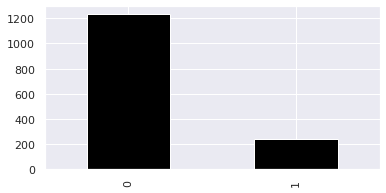

In [19]:
data['Attrition'].value_counts().plot(kind='bar',color='black')

We can see that there is a much smaller number of cases or samples where Attrition is true. 
Since we are going to leverage logistic regression, we might consider using case control sampling, because we know that the maximum ratio between controls and cases (stay vs. attrition) should be a maximum of 5:1.
At the moment, we are at about 1200:200. This is a 6:1 ratio. 
Let's leverage case control sampling to get only roughly 1000:200, so that we can reduce the variance of our parameter estimates. 

__Case Control Sampling__

0    1000
1     237
Name: Attrition, dtype: int64


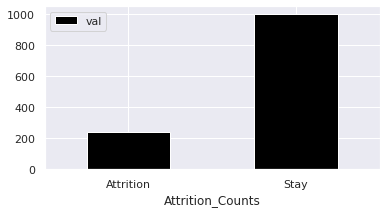

In [20]:
data_attrit = data.loc[data['Attrition']==1]
data_stay = data.loc[data['Attrition']==0]
case_control = data_stay.sample(n=1000,replace=False,random_state=1)
case_control = case_control.reset_index(drop=True)
data = pd.concat([data_attrit, case_control], axis=0)
data = data.reset_index(drop=True)

attrition_counts = data['Attrition'].value_counts()
print(attrition_counts)
df = pd.DataFrame({'Attrition_Counts':['Attrition', 'Stay'], 'val':[237,1000]})

ax = df.plot.bar(x='Attrition_Counts', y='val', rot=0,color='black')

#### Predictors

Let's look at the distribution of each of our variables, to see if any of them can be dropped or if there is additional information we can learn about them.

We will start with our numeric variables, and use histograms to understand their distributions.

__Age__

Attrition
0    AxesSubplot(0.547727,0.125;0.352273x0.755)
1    AxesSubplot(0.547727,0.125;0.352273x0.755)
Name: Age, dtype: object

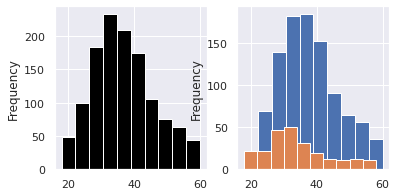

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=2)
data['Age'].plot(ax=axes[0],kind='hist',color='black')
data['Age'].groupby(data['Attrition']).plot(ax=axes[1],kind='hist')

We can see that age follows a normal distribution.

__DailyRate__

Attrition
0    AxesSubplot(0.547727,0.125;0.352273x0.755)
1    AxesSubplot(0.547727,0.125;0.352273x0.755)
Name: DailyRate, dtype: object

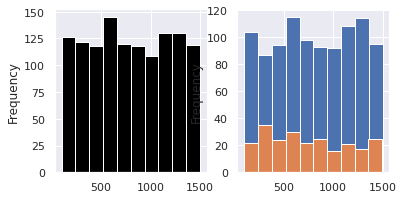

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=2)
data['DailyRate'].plot(ax=axes[0],kind='hist',color='black')
data['DailyRate'].groupby(data['Attrition']).plot(ax=axes[1],kind='hist')

We can tell that this predictor is likely not normally distributed, and is potentially uniformly distributed. 

If we want to use this variable as a predictor in our model, it will rule out analyses that assume normally distributed predictors, like linear discriminant analysis.

We will need to keep this in mind.

__DistanceFromHome__

Attrition
0    AxesSubplot(0.547727,0.125;0.352273x0.755)
1    AxesSubplot(0.547727,0.125;0.352273x0.755)
Name: DistanceFromHome, dtype: object

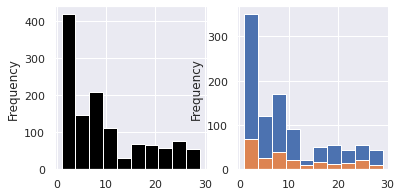

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=2)
data['DistanceFromHome'].plot(ax=axes[0],kind='hist',color='black')
data['DistanceFromHome'].groupby(data['Attrition']).plot(ax=axes[1],kind='hist')

The distribution is quite skewed, with most individuals having a small value for distance from home. 
We may consider dropping this from our analysis.

__Education__

Attrition
0    AxesSubplot(0.547727,0.125;0.352273x0.755)
1    AxesSubplot(0.547727,0.125;0.352273x0.755)
Name: Education, dtype: object

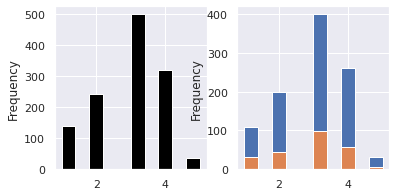

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=2)
data['Education'].plot(ax=axes[0],kind='hist',color='black')
data['Education'].groupby(data['Attrition']).plot(ax=axes[1],kind='hist')

This variable actually encodes a categorical scale. 
Education
1 'Below College'
2 'College'
3 'Bachelor'
4 'Master'
5 'Doctor'

Let's create a variable to encode the highest degree level obtained, rather than using this scale.

We will create the variable as follows:
Education: No degree
Education: undergrad
Education: grad

It will align more closely with what this variable is attempting to encode. Additionally, because it is truly a categorical variable, we want to encode it correctly, so we don't experience issues later.

<AxesSubplot:>

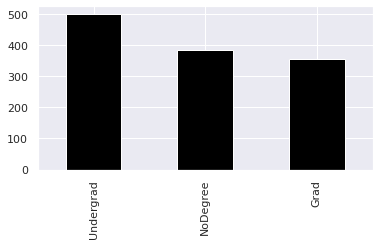

In [25]:
data['Education'] = data['Education'].replace(1,'NoDegree')
data['Education'] = data['Education'].replace(2,'NoDegree')
data['Education'] = data['Education'].replace(3,'Undergrad')
data['Education'] = data['Education'].replace(4,'Grad')
data['Education'] = data['Education'].replace(5,'Grad')

data['Education'].value_counts().plot(kind='bar',color='black')

We see that our samples are more evenly distributed amongst the possible values, and that the variable more accurately captures the measured attribute.

In [26]:
data = pd.get_dummies(data)

__EmployeeCount__

Attrition
0    AxesSubplot(0.547727,0.125;0.352273x0.755)
1    AxesSubplot(0.547727,0.125;0.352273x0.755)
Name: EmployeeCount, dtype: object

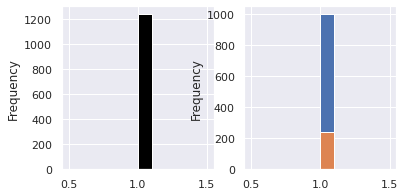

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=2)
data['EmployeeCount'].plot(ax=axes[0],kind='hist',color='black')
data['EmployeeCount'].groupby(data['Attrition']).plot(ax=axes[1],kind='hist')

We can see that each employee has the same value for this variable - we will drop this from our analysis.

In [28]:
data = data.drop(columns=['EmployeeCount'])

Let's take a look at it again, now that we have our dummy variables created. 

__EmployeeNumber__

Attrition
0    AxesSubplot(0.547727,0.125;0.352273x0.755)
1    AxesSubplot(0.547727,0.125;0.352273x0.755)
Name: EmployeeNumber, dtype: object

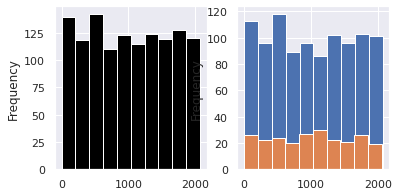

In [29]:
fig, axes = plt.subplots(nrows=1, ncols=2)
data['EmployeeNumber'].plot(ax=axes[0],kind='hist',color='black')
data['EmployeeNumber'].groupby(data['Attrition']).plot(ax=axes[1],kind='hist')

The histogram actually hides the fact that each employee has a unique employee number. 
This is common in databases, and it was likely the primary key for the table. 

In [30]:
data['EmployeeNumber'].value_counts()

1       1
1647    1
824     1
316     1
482     1
       ..
916     1
452     1
198     1
513     1
680     1
Name: EmployeeNumber, Length: 1237, dtype: int64

We can remove this variable from our analysis.

In [31]:
data = data.drop(columns=['EmployeeNumber'])

__EnvironmentSatisfaction__

Attrition
0    AxesSubplot(0.547727,0.125;0.352273x0.755)
1    AxesSubplot(0.547727,0.125;0.352273x0.755)
Name: EnvironmentSatisfaction, dtype: object

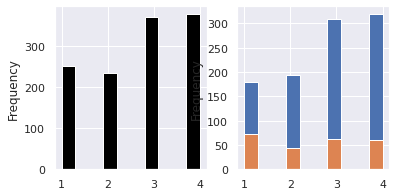

In [32]:
fig, axes = plt.subplots(nrows=1, ncols=2)
data['EnvironmentSatisfaction'].plot(ax=axes[0],kind='hist',color='black')
data['EnvironmentSatisfaction'].groupby(data['Attrition']).plot(ax=axes[1],kind='hist')

This is another variable that is truly a categorical variable. 

EnvironmentSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

Lets create a boolean variable to encode this more effectively. 

We will create two categories:
1,2 - Less Satisfied 
3,4 - MoreVery Satisfied

<AxesSubplot:title={'center':'EnvironmentSatisfaction'}>

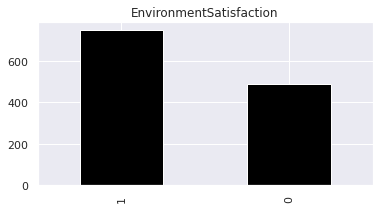

In [33]:
data['EnvironmentSatisfaction'] = data['EnvironmentSatisfaction'].replace(1,0)
data['EnvironmentSatisfaction'] = data['EnvironmentSatisfaction'].replace(2,0)
data['EnvironmentSatisfaction'] = data['EnvironmentSatisfaction'].replace(3,1)
data['EnvironmentSatisfaction'] = data['EnvironmentSatisfaction'].replace(4,1)

data['EnvironmentSatisfaction'].value_counts().plot(kind='bar',title='EnvironmentSatisfaction',color='black')

__HourlyRate__

Attrition
0    AxesSubplot(0.547727,0.125;0.352273x0.755)
1    AxesSubplot(0.547727,0.125;0.352273x0.755)
Name: HourlyRate, dtype: object

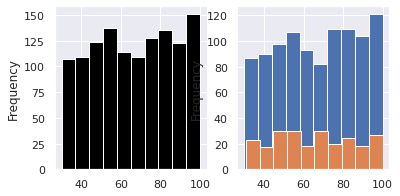

In [34]:
fig, axes = plt.subplots(nrows=1, ncols=2)
data['HourlyRate'].plot(ax=axes[0],kind='hist',color='black')
data['HourlyRate'].groupby(data['Attrition']).plot(ax=axes[1],kind='hist')

__JobInvolvement__

Attrition
0    AxesSubplot(0.547727,0.125;0.352273x0.755)
1    AxesSubplot(0.547727,0.125;0.352273x0.755)
Name: JobInvolvement, dtype: object

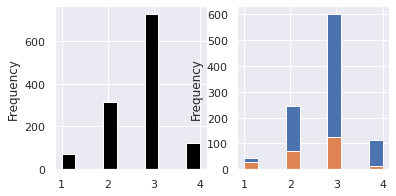

In [35]:
fig, axes = plt.subplots(nrows=1, ncols=2)
data['JobInvolvement'].plot(ax=axes[0],kind='hist',color='black')
data['JobInvolvement'].groupby(data['Attrition']).plot(ax=axes[1],kind='hist')

This is another variable that is truly a categorical variable.

JobInvolvement

1 'Low'
2 'Medium'
3 'High'
4 'Very High'

Lets create a categorical variable to encode this more effectively. 

We will create two categories and encode as a boolean.
1,2 - LessInvolved  (0)
2,3 - MoreInvolved  (1)


Attrition
0    AxesSubplot(0.547727,0.125;0.352273x0.755)
1    AxesSubplot(0.547727,0.125;0.352273x0.755)
Name: JobInvolvement, dtype: object

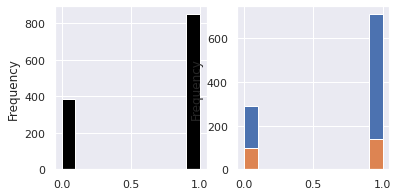

In [36]:
data['JobInvolvement'] = data['JobInvolvement'].replace(1,0)
data['JobInvolvement'] = data['JobInvolvement'].replace(2,0)
data['JobInvolvement'] = data['JobInvolvement'].replace(3,1)
data['JobInvolvement'] = data['JobInvolvement'].replace(4,1)

fig, axes = plt.subplots(nrows=1, ncols=2)
data['JobInvolvement'].plot(ax=axes[0],kind='hist',color='black')
data['JobInvolvement'].groupby(data['Attrition']).plot(ax=axes[1],kind='hist')

__JobLevel__

Attrition
0    AxesSubplot(0.547727,0.125;0.352273x0.755)
1    AxesSubplot(0.547727,0.125;0.352273x0.755)
Name: JobLevel, dtype: object

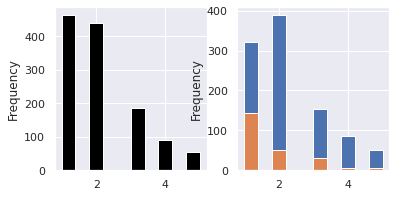

In [37]:
fig, axes = plt.subplots(nrows=1, ncols=2)
data['JobLevel'].plot(ax=axes[0],kind='hist',color='black')
data['JobLevel'].groupby(data['Attrition']).plot(ax=axes[1],kind='hist')

We note that there is a difference in the distribution between attrition and retention - this might suggest that this variable might explain differences between the groups.

__JobSatisfaction__

Attrition
0    AxesSubplot(0.547727,0.125;0.352273x0.755)
1    AxesSubplot(0.547727,0.125;0.352273x0.755)
Name: JobSatisfaction, dtype: object

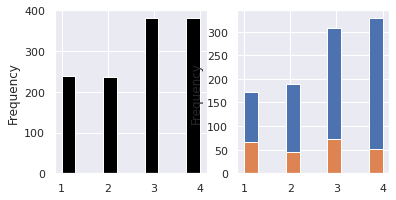

In [38]:
fig, axes = plt.subplots(nrows=1, ncols=2)
data['JobSatisfaction'].plot(ax=axes[0],kind='hist',color='black')
data['JobSatisfaction'].groupby(data['Attrition']).plot(ax=axes[1],kind='hist')

This is another categorical variable. 

We notice that this variable is similar to another variable we've looked at - environment satisfaction. 

We might expect that this variable is correlated to environment satisfaction.

JobSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

Let's change this variable to encode less satisfied vs. more satisfied.

In [39]:
data['JobSatisfaction'] = data['JobSatisfaction'].replace(1,0)
data['JobSatisfaction'] = data['JobSatisfaction'].replace(2,0)
data['JobSatisfaction'] = data['JobSatisfaction'].replace(3,1)
data['JobSatisfaction'] = data['JobSatisfaction'].replace(4,1)

Attrition
0    AxesSubplot(0.547727,0.125;0.352273x0.755)
1    AxesSubplot(0.547727,0.125;0.352273x0.755)
Name: JobSatisfaction, dtype: object

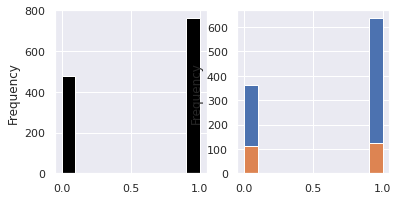

In [40]:
fig, axes = plt.subplots(nrows=1, ncols=2)
data['JobSatisfaction'].plot(ax=axes[0],kind='hist',color='black')
data['JobSatisfaction'].groupby(data['Attrition']).plot(ax=axes[1],kind='hist')

<AxesSubplot:>

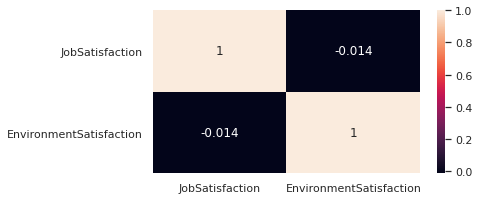

In [41]:
data_satis = data[['JobSatisfaction','EnvironmentSatisfaction']]
corrMatrix = data_satis.corr()
sn.heatmap(corrMatrix,annot=True)

We see that these variables are not very strongly correlated with each other, so we leave both in our predictor set for now.

__MonthlyRate__

Attrition
0    AxesSubplot(0.547727,0.125;0.352273x0.755)
1    AxesSubplot(0.547727,0.125;0.352273x0.755)
Name: MonthlyRate, dtype: object

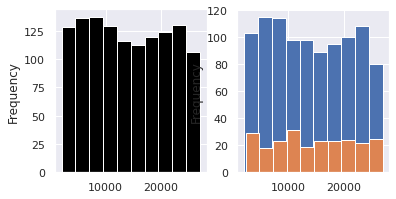

In [42]:
fig, axes = plt.subplots(nrows=1, ncols=2)
data['MonthlyRate'].plot(ax=axes[0],kind='hist',color='black')
data['MonthlyRate'].groupby(data['Attrition']).plot(ax=axes[1],kind='hist')

We notice that there are a few variables that likely encode very similar information: 
Monthly Rate, Daily Rate, and Monthly Income. 
Let's see whether they're correlated, so we can potentially eliminate one or more parameters.

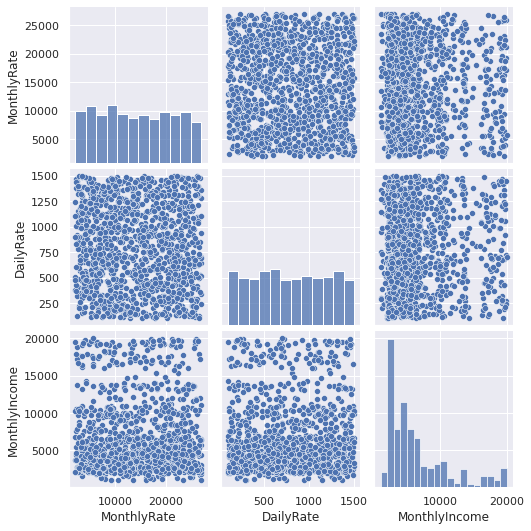

In [43]:
data_money = data[['MonthlyRate','DailyRate','MonthlyIncome']]
sn.pairplot(data_money)

Unfortunately, there is not an obvious correlation between these variables, so we will leave them all in our predictor set for now.

__Monthly Income__

Attrition
0    AxesSubplot(0.547727,0.125;0.352273x0.755)
1    AxesSubplot(0.547727,0.125;0.352273x0.755)
Name: MonthlyIncome, dtype: object

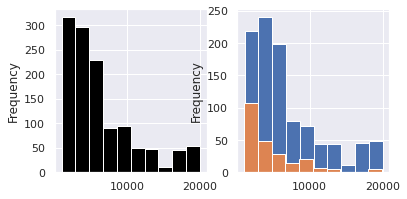

In [44]:
fig, axes = plt.subplots(nrows=1, ncols=2)
data['MonthlyIncome'].plot(ax=axes[0],kind='hist',color='black')
data['MonthlyIncome'].groupby(data['Attrition']).plot(ax=axes[1],kind='hist')

__Num Companies Worked__

Attrition
0    AxesSubplot(0.547727,0.125;0.352273x0.755)
1    AxesSubplot(0.547727,0.125;0.352273x0.755)
Name: NumCompaniesWorked, dtype: object

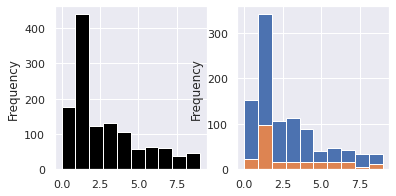

In [45]:
fig, axes = plt.subplots(nrows=1, ncols=2)
data['NumCompaniesWorked'].plot(ax=axes[0],kind='hist',color='black')
data['NumCompaniesWorked'].groupby(data['Attrition']).plot(ax=axes[1],kind='hist')

__OverTime__

Attrition
0    AxesSubplot(0.547727,0.125;0.352273x0.755)
1    AxesSubplot(0.547727,0.125;0.352273x0.755)
Name: OverTime, dtype: object

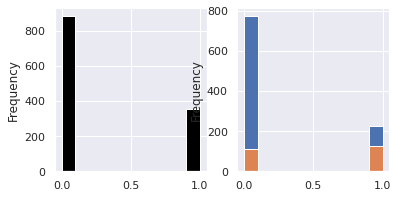

In [46]:
fig, axes = plt.subplots(nrows=1, ncols=2)
data['OverTime'].plot(ax=axes[0],kind='hist',color='black')
data['OverTime'].groupby(data['Attrition']).plot(ax=axes[1],kind='hist')

__PercentSalaryHike__

Attrition
0    AxesSubplot(0.547727,0.125;0.352273x0.755)
1    AxesSubplot(0.547727,0.125;0.352273x0.755)
Name: PercentSalaryHike, dtype: object

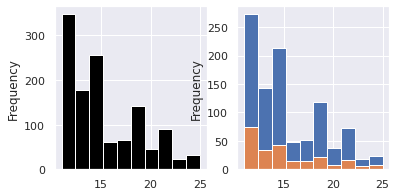

In [47]:
fig, axes = plt.subplots(nrows=1, ncols=2)
data['PercentSalaryHike'].plot(ax=axes[0],kind='hist',color='black')
data['PercentSalaryHike'].groupby(data['Attrition']).plot(ax=axes[1],kind='hist')

__PerformanceRating__

Attrition
0    AxesSubplot(0.547727,0.125;0.352273x0.755)
1    AxesSubplot(0.547727,0.125;0.352273x0.755)
Name: PerformanceRating, dtype: object

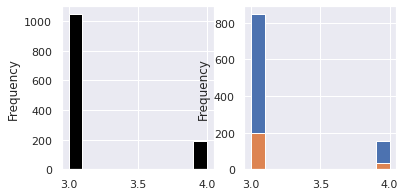

In [48]:
fig, axes = plt.subplots(nrows=1, ncols=2)
data['PerformanceRating'].plot(ax=axes[0],kind='hist',color='black')
data['PerformanceRating'].groupby(data['Attrition']).plot(ax=axes[1],kind='hist')

This is another categorical variable. 

We see that out of the total scale, we only have individuals with a high performance rating. 

Because we do not have much variance in this predictor, and because we could interpret this predictor to mean high performers such that all members fall within the same value, we can eliminate this predictor from our analysis.

PerformanceRating
1 'Low'
2 'Good'
3 'Excellent'
4 'Outstanding'

In [49]:
data = data.drop(columns=['PerformanceRating'])

__RelationshipSatisfaction__

Attrition
0    AxesSubplot(0.547727,0.125;0.352273x0.755)
1    AxesSubplot(0.547727,0.125;0.352273x0.755)
Name: RelationshipSatisfaction, dtype: object

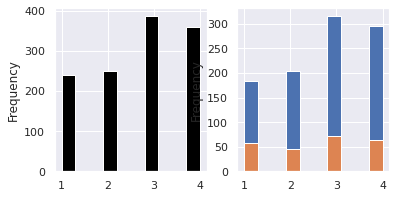

In [50]:
fig, axes = plt.subplots(nrows=1, ncols=2)
data['RelationshipSatisfaction'].plot(ax=axes[0],kind='hist',color='black')
data['RelationshipSatisfaction'].groupby(data['Attrition']).plot(ax=axes[1],kind='hist')

Once again, a categorical variable. 

RelationshipSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

Let's encode it as a boolean variable, to more accurately encode the predictor.
1,2 - less satisfied
3,4 - more satisfied

In [51]:
data['RelationshipSatisfaction'] = data['RelationshipSatisfaction'].replace(1,0)
data['RelationshipSatisfaction'] = data['RelationshipSatisfaction'].replace(2,0)
data['RelationshipSatisfaction'] = data['RelationshipSatisfaction'].replace(3,1)
data['RelationshipSatisfaction'] = data['RelationshipSatisfaction'].replace(4,1)

We suspect that marital status and relationship satisfaction might be intercorrelated - we will investigate when we compare the correlations between our variables.

<AxesSubplot:>

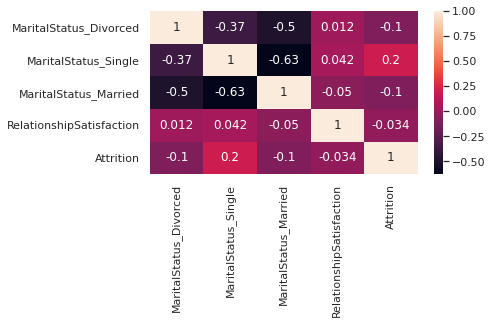

In [52]:
data_marital = data[['MaritalStatus_Divorced','MaritalStatus_Single','MaritalStatus_Married','RelationshipSatisfaction','Attrition']]
corrMatrix = data_marital.corr()
sn.heatmap(corrMatrix,annot=True)

There is not a strong correlation between relationship satisfaction and any of our marital status variables. 

We do notice, however, that there is a moderate correlation between marital status variables. 

We will revisit these correlations later when we look at the collinearity between all of our predictors.

__StandardHours__

Attrition
0    AxesSubplot(0.547727,0.125;0.352273x0.755)
1    AxesSubplot(0.547727,0.125;0.352273x0.755)
Name: StandardHours, dtype: object

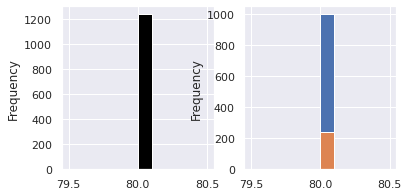

In [53]:
fig, axes = plt.subplots(nrows=1, ncols=2)
data['StandardHours'].plot(ax=axes[0],kind='hist',color='black')
data['StandardHours'].groupby(data['Attrition']).plot(ax=axes[1],kind='hist')

We see that all observations have the same value for this predictor - we can drop this from our analysis.

In [54]:
data = data.drop(columns=['StandardHours'])

__Stock Option Level__

Attrition
0    AxesSubplot(0.547727,0.125;0.352273x0.755)
1    AxesSubplot(0.547727,0.125;0.352273x0.755)
Name: StockOptionLevel, dtype: object

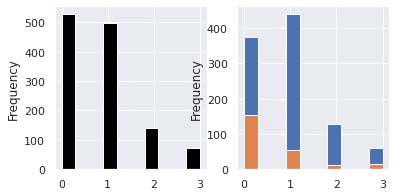

In [55]:
fig, axes = plt.subplots(nrows=1, ncols=2)
data['StockOptionLevel'].plot(ax=axes[0],kind='hist',color='black')
data['StockOptionLevel'].groupby(data['Attrition']).plot(ax=axes[1],kind='hist')

__TotalWorkingYears__

Attrition
0    AxesSubplot(0.547727,0.125;0.352273x0.755)
1    AxesSubplot(0.547727,0.125;0.352273x0.755)
Name: TotalWorkingYears, dtype: object

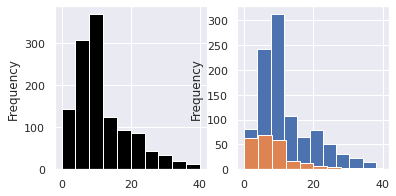

In [56]:
fig, axes = plt.subplots(nrows=1, ncols=2)
data['TotalWorkingYears'].plot(ax=axes[0],kind='hist',color='black')
data['TotalWorkingYears'].groupby(data['Attrition']).plot(ax=axes[1],kind='hist')

We suspect that this variable might be strongly intercorrelated with age and job level.
This is because the older someone is, the more likely they are to have a higher job level / more working years.

<AxesSubplot:>

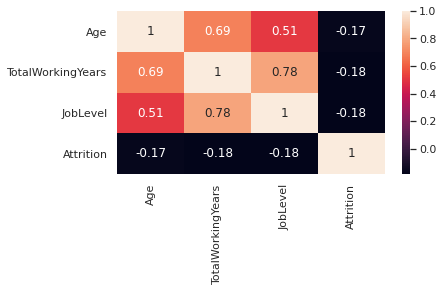

In [57]:
data_satis = data[['Age','TotalWorkingYears','JobLevel','Attrition']]
corrMatrix = data_satis.corr()
sn.heatmap(corrMatrix,annot=True)

Our suspicions were correct - they are moderately to strongly correlated.

We will plan to remove variables that cause this strong collinearity, but because we are utilizing a parametric approach, we will want to investigate the collinearity across all of our predictors - we just note that it is a strong intercorrelation between these variables.

In [58]:
data = data.drop(columns=['TotalWorkingYears'])

__TrainingTimesLastYear__

Attrition
0    AxesSubplot(0.547727,0.125;0.352273x0.755)
1    AxesSubplot(0.547727,0.125;0.352273x0.755)
Name: TrainingTimesLastYear, dtype: object

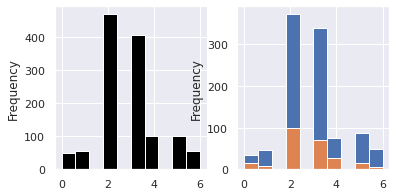

In [59]:
fig, axes = plt.subplots(nrows=1, ncols=2)
data['TrainingTimesLastYear'].plot(ax=axes[0],kind='hist',color='black')
data['TrainingTimesLastYear'].groupby(data['Attrition']).plot(ax=axes[1],kind='hist')

__WorkLifeBalance__

Attrition
0    AxesSubplot(0.547727,0.125;0.352273x0.755)
1    AxesSubplot(0.547727,0.125;0.352273x0.755)
Name: WorkLifeBalance, dtype: object

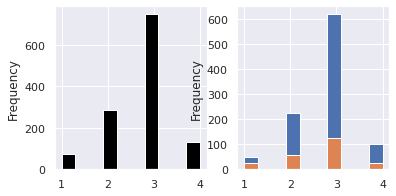

In [60]:
fig, axes = plt.subplots(nrows=1, ncols=2)
data['WorkLifeBalance'].plot(ax=axes[0],kind='hist',color='black')
data['WorkLifeBalance'].groupby(data['Attrition']).plot(ax=axes[1],kind='hist')

This is our final categorical variable. 

WorkLifeBalance
1 'Bad'
2 'Good'
3 'Better'
4 'Best'

We can encode this as having less or more worklife balance to better capture the categorical nature of this variable.

In [61]:
data['WorkLifeBalance'] = data['WorkLifeBalance'].replace(1,0)
data['WorkLifeBalance'] = data['WorkLifeBalance'].replace(2,0)
data['WorkLifeBalance'] = data['WorkLifeBalance'].replace(3,1)
data['WorkLifeBalance'] = data['WorkLifeBalance'].replace(4,1)

__Years At Company__

Attrition
0    AxesSubplot(0.547727,0.125;0.352273x0.755)
1    AxesSubplot(0.547727,0.125;0.352273x0.755)
Name: YearsAtCompany, dtype: object

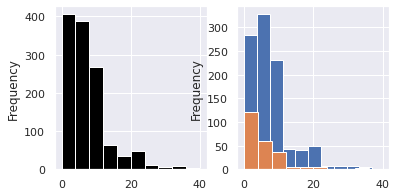

In [62]:
fig, axes = plt.subplots(nrows=1, ncols=2)
data['YearsAtCompany'].plot(ax=axes[0],kind='hist',color='black')
data['YearsAtCompany'].groupby(data['Attrition']).plot(ax=axes[1],kind='hist')

__YearsInCurrentRole__

Attrition
0    AxesSubplot(0.547727,0.125;0.352273x0.755)
1    AxesSubplot(0.547727,0.125;0.352273x0.755)
Name: YearsInCurrentRole, dtype: object

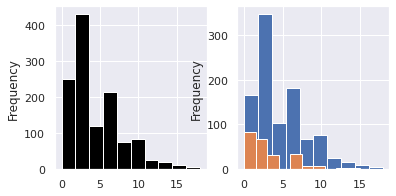

In [63]:
fig, axes = plt.subplots(nrows=1, ncols=2)
data['YearsInCurrentRole'].plot(ax=axes[0],kind='hist',color='black')
data['YearsInCurrentRole'].groupby(data['Attrition']).plot(ax=axes[1],kind='hist')

__YearsWithCurrManager__

Attrition
0    AxesSubplot(0.547727,0.125;0.352273x0.755)
1    AxesSubplot(0.547727,0.125;0.352273x0.755)
Name: YearsWithCurrManager, dtype: object

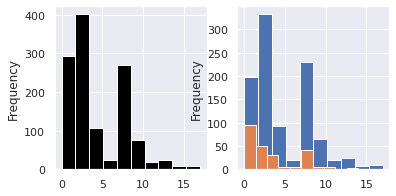

In [64]:
fig, axes = plt.subplots(nrows=1, ncols=2)
data['YearsWithCurrManager'].plot(ax=axes[0],kind='hist',color='black')
data['YearsWithCurrManager'].groupby(data['Attrition']).plot(ax=axes[1],kind='hist')

We suspect that Age, YearsWithCurrManager, YearsInCurrentRole, and YearsAtCompany might be intercorrelated

<AxesSubplot:>

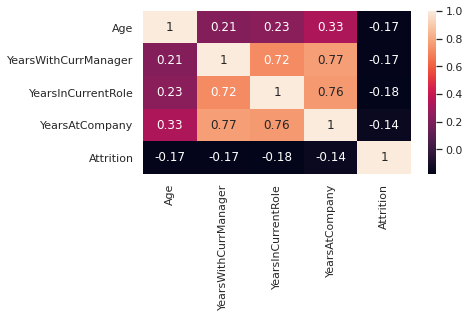

In [65]:
data_satis = data[['Age','YearsWithCurrManager','YearsInCurrentRole','YearsAtCompany','Attrition']]
corrMatrix = data_satis.corr()
sn.heatmap(corrMatrix,annot=True)

As we suspected, there is some obvious intercorrelation.

However, they are not necessarily intercorrelated with age. 

Years with current manager and years in current role encode very similar information, and therefore, we only need to keep one of the variables. 

We will investigate which predictors we want to drop from our analysis, and note here that there appears to be a strong intercorrelation between these predictors.


In [66]:
data = data.drop(columns=['YearsAtCompany'])

__YearsSinceLastPromotion__

Attrition
0    AxesSubplot(0.547727,0.125;0.352273x0.755)
1    AxesSubplot(0.547727,0.125;0.352273x0.755)
Name: YearsSinceLastPromotion, dtype: object

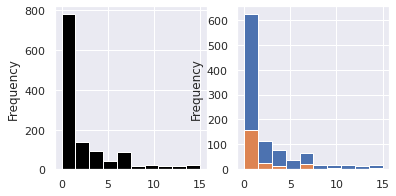

In [67]:
fig, axes = plt.subplots(nrows=1, ncols=2)
data['YearsSinceLastPromotion'].plot(ax=axes[0],kind='hist',color='black')
data['YearsSinceLastPromotion'].groupby(data['Attrition']).plot(ax=axes[1],kind='hist')

In [68]:
data2 = data

#### Summary

We have explored the distributions of our continuous numerical variables, and done some data cleaning and investigation, based on available domain knowledge. 
We notice that very few of our predictors likely have a normal distribution within each class, so therefore, we can rule out classification methods like linear discriminant analysis. 
We also notice that there is not obvious separation between the classes within each predictor - this suggests that logistic regression is a stable approach.

Now that we have prepared all of our variables, we need to investigate collinearity, and remove strongly correlated predictors.

#### Collinearity

Predictors that are highly collinear need to be dropped from our analysis. 
We can either combine predictors, create new predictors, or investigate highly correlated factors and keep one out of a pair of highly correlated predictors.

In [69]:
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

Our first approach will be to leverage a heatmap, so we can see highly correlated factors easily.

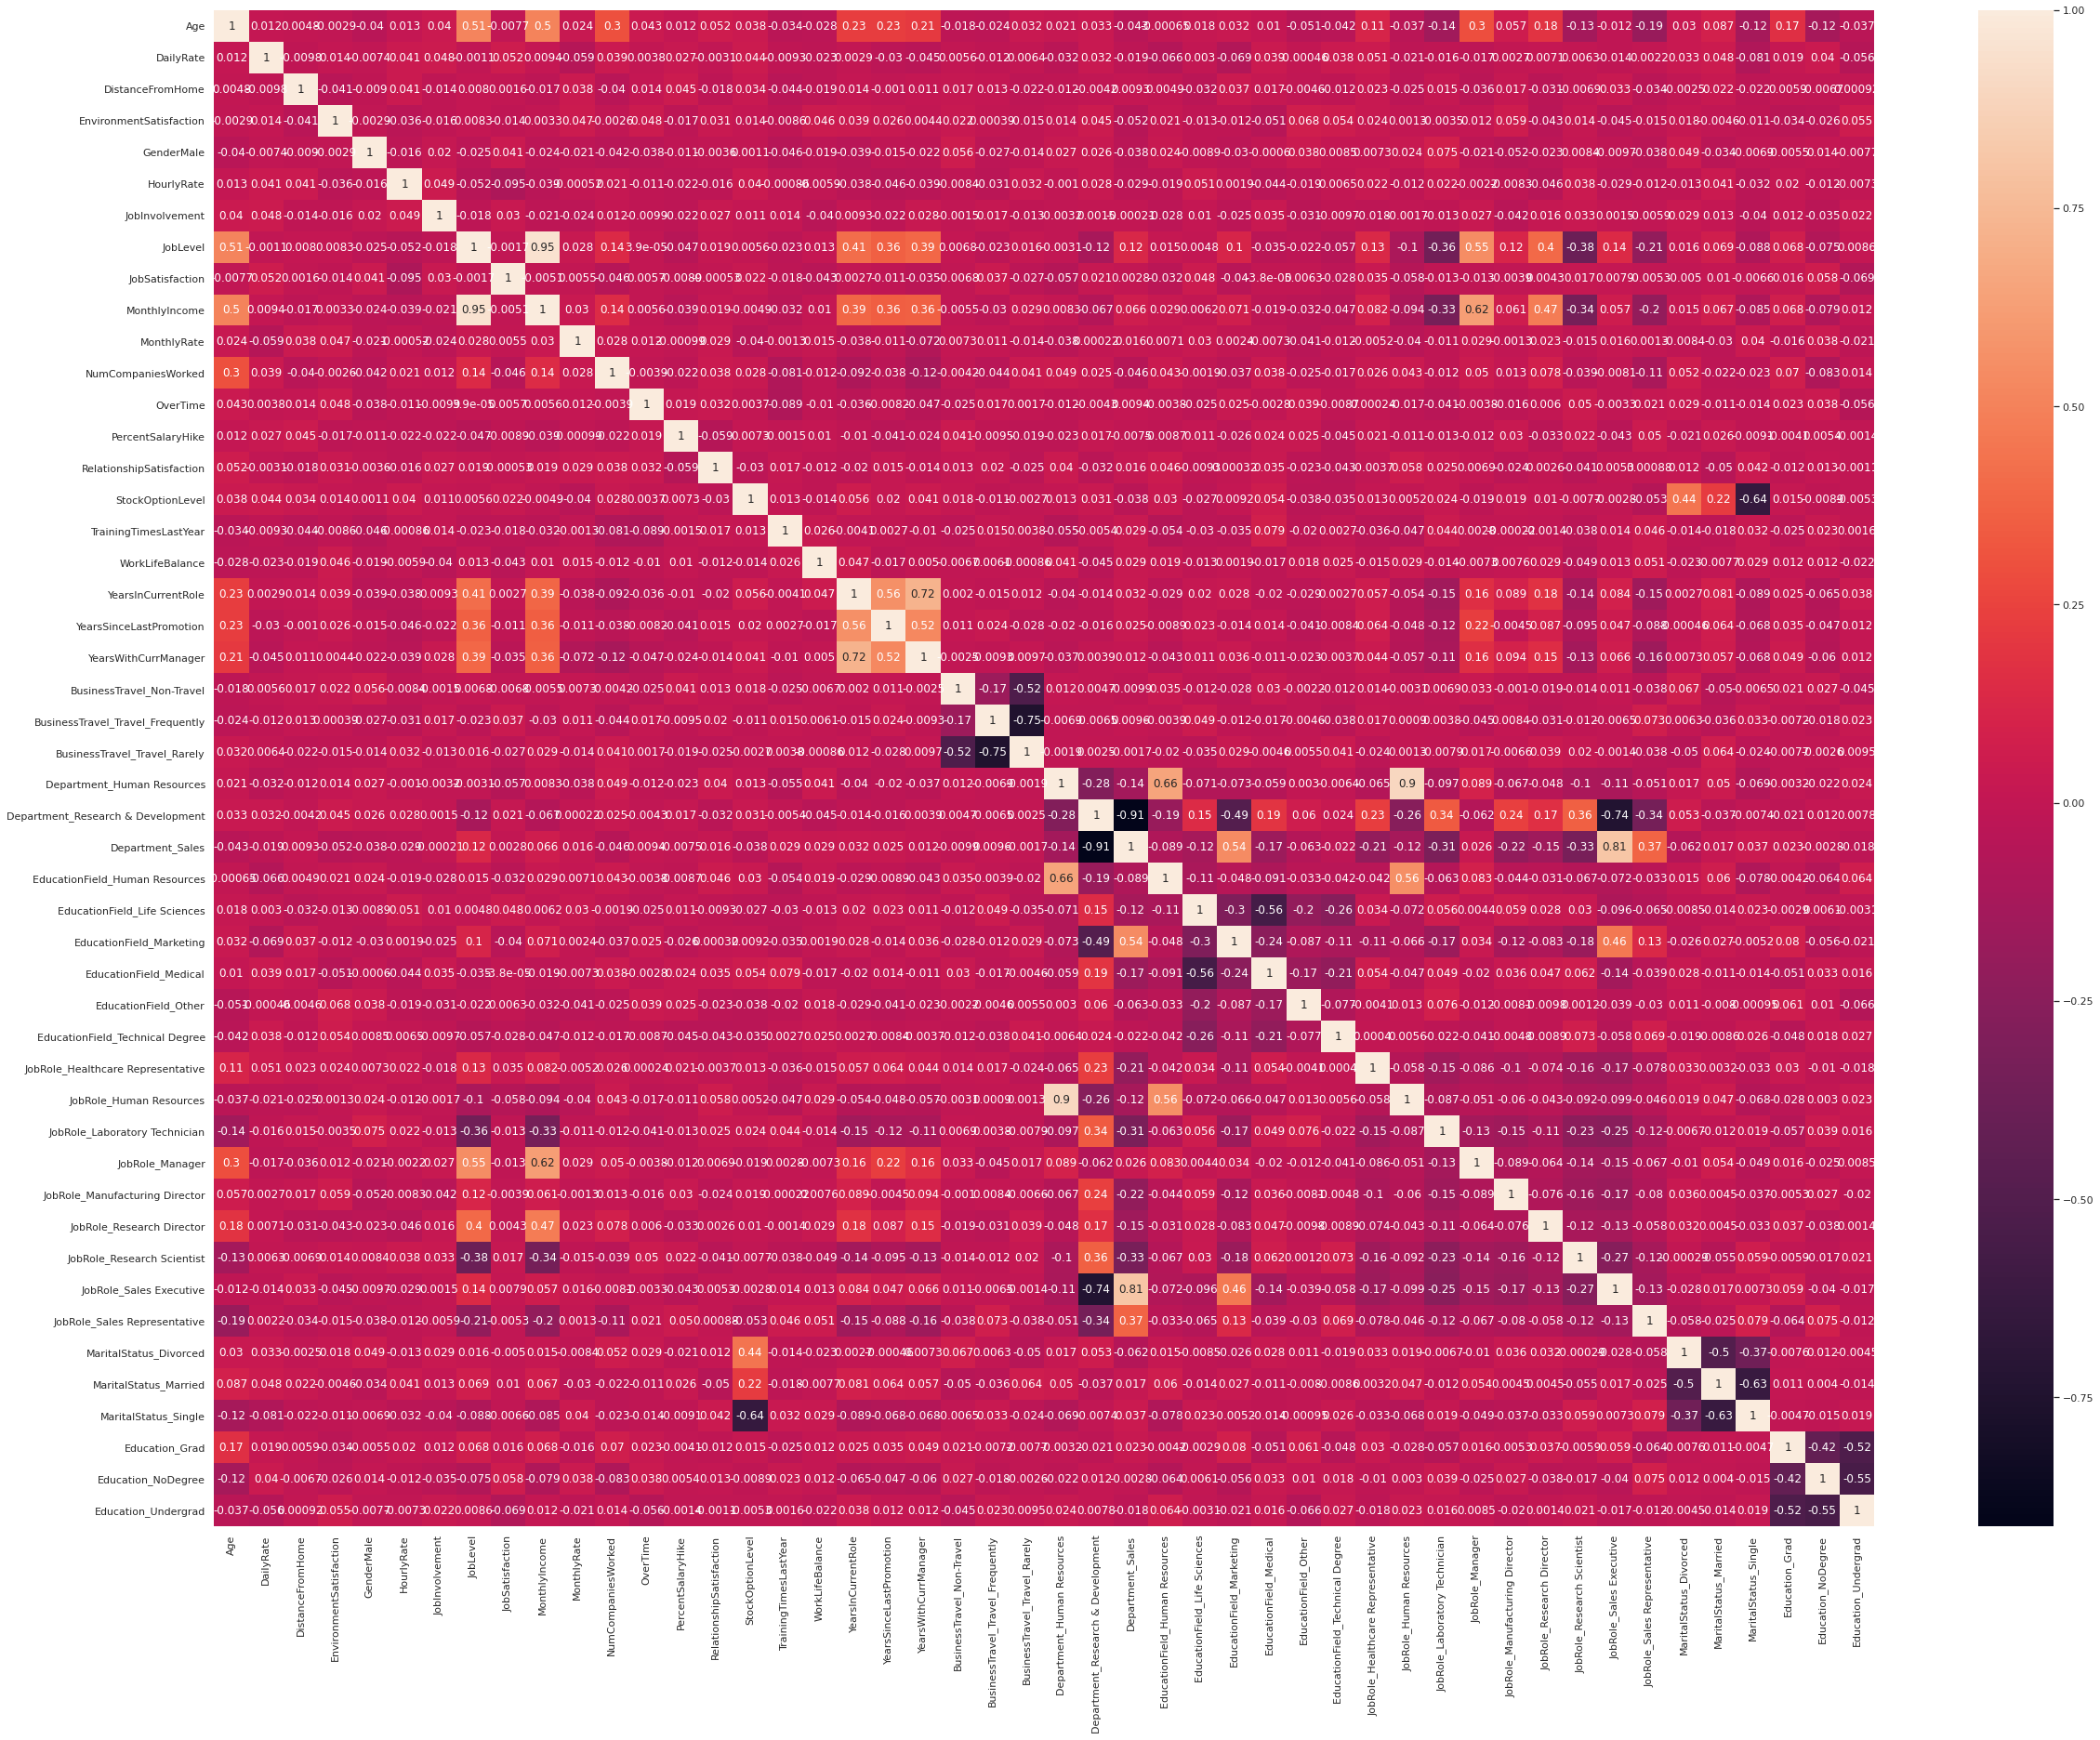

In [70]:
data_corr = data.drop(['Attrition'],axis=1)
corrMatrix = data_corr.corr()
sn.set(rc={'figure.figsize':(40,30)})
sn.set(font_scale=1)
sn.heatmap(corrMatrix, annot=True)
plt.show()

Let's take a look at our dummy categorical variables first - we know that they will likely be strongly intercorrelated, given that they are dummy variables for the same feature.

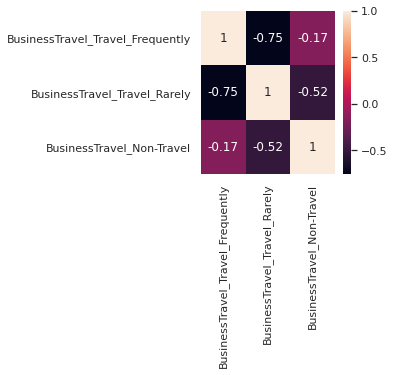

In [71]:
data_travel = data[['BusinessTravel_Travel_Frequently','BusinessTravel_Travel_Rarely','BusinessTravel_Non-Travel']]
corrMatrix = data_travel.corr()
sn.set(rc={'figure.figsize':(3,3)})
sn.set(font_scale=1)
sn.heatmap(corrMatrix, annot=True)
plt.show()

We can see that business travel rarely and business travel frequently are strongly negatively correlated. 
This makes sense, since someone who does not travel frequently would be true for travels rarely.
Let's keep business travel frequently, so that when we are interpreting coefficients, we know business travel frequently 1 is true.


In [72]:
data = data.drop(columns=['BusinessTravel_Travel_Rarely'])

We saw earlier that the Human Resources categories had a very small number of observations, and they appear to be strongly intercorrelated. 

Let's investigate.

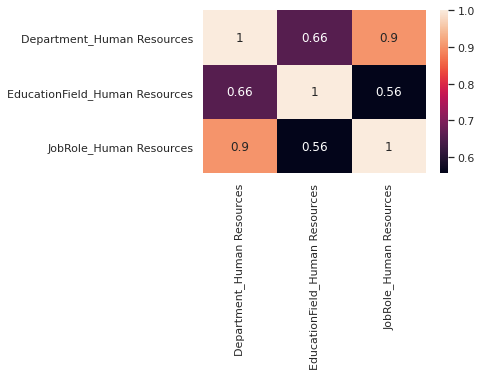

In [73]:
data_travel = data[['Department_Human Resources','EducationField_Human Resources','JobRole_Human Resources']]
corrMatrix = data_travel.corr()
sn.set(rc={'figure.figsize':(5,3)})
sn.set(font_scale=1)
sn.heatmap(corrMatrix, annot=True)
plt.show()

We can see that the department and job role are moderately to strongly correlated. 
This makes sense - if an employee is in the human resources department, they are very likely to have a job role in human resources. 
Let's look at our job roles and departments, and see if there are other strong correlations.

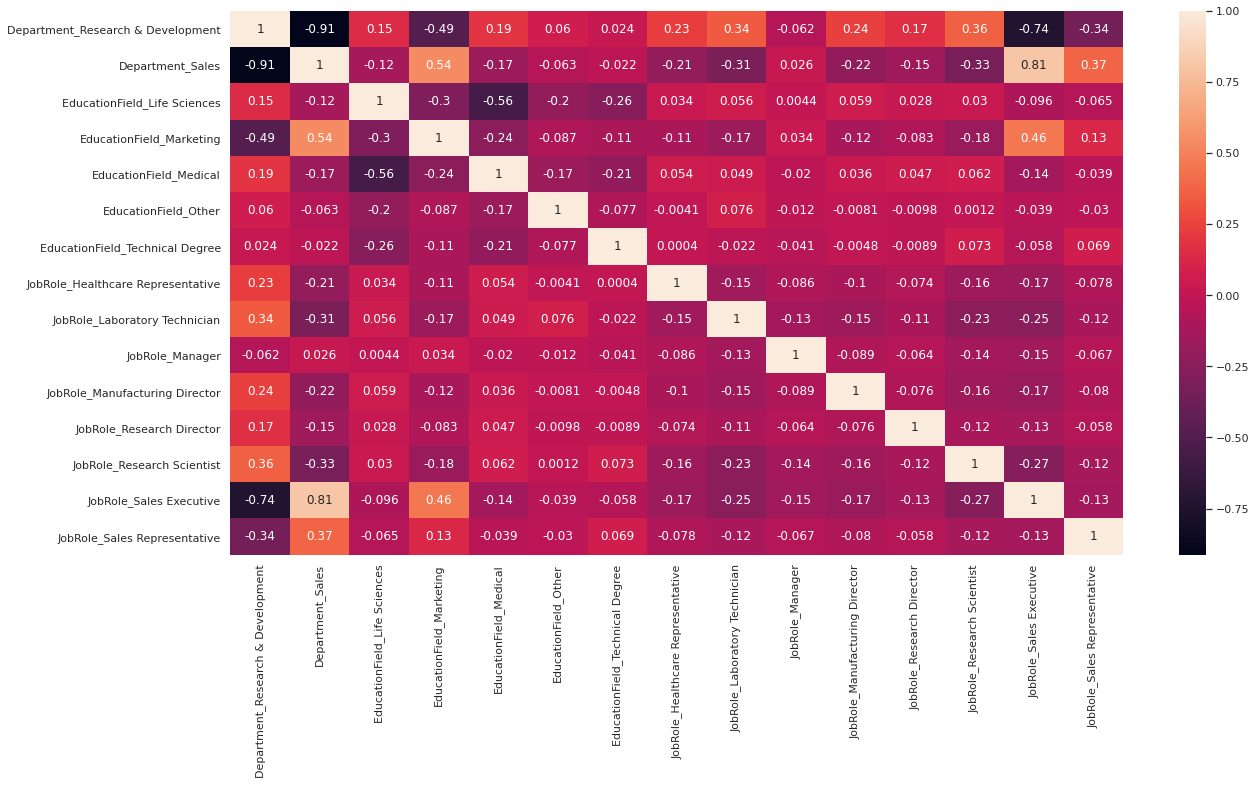

In [74]:
data_travel = data[['Department_Research & Development','Department_Sales','EducationField_Life Sciences','EducationField_Marketing','EducationField_Medical','EducationField_Other','EducationField_Technical Degree','JobRole_Healthcare Representative','JobRole_Laboratory Technician','JobRole_Manager','JobRole_Manufacturing Director','JobRole_Research Director','JobRole_Research Scientist','JobRole_Sales Executive','JobRole_Sales Representative']]       
corrMatrix = data_travel.corr()
sn.set(rc={'figure.figsize':(20,10)})
sn.set(font_scale=1)
sn.heatmap(corrMatrix, annot=True)
plt.show()

It appears that both of our other department variables are strongly correlated with other variables. 

Because we've seen that the human resources department is collinear with the human resources role, let's eliminate all of our department variables, since they are collinear with other variables and are encoding similar information to the job role variables.

In [75]:
data = data.drop(columns=['Department_Human Resources','Department_Research & Development','Department_Sales'])

Let's look at our heatmap again, now that we've eliminated the strongly collinear variables.

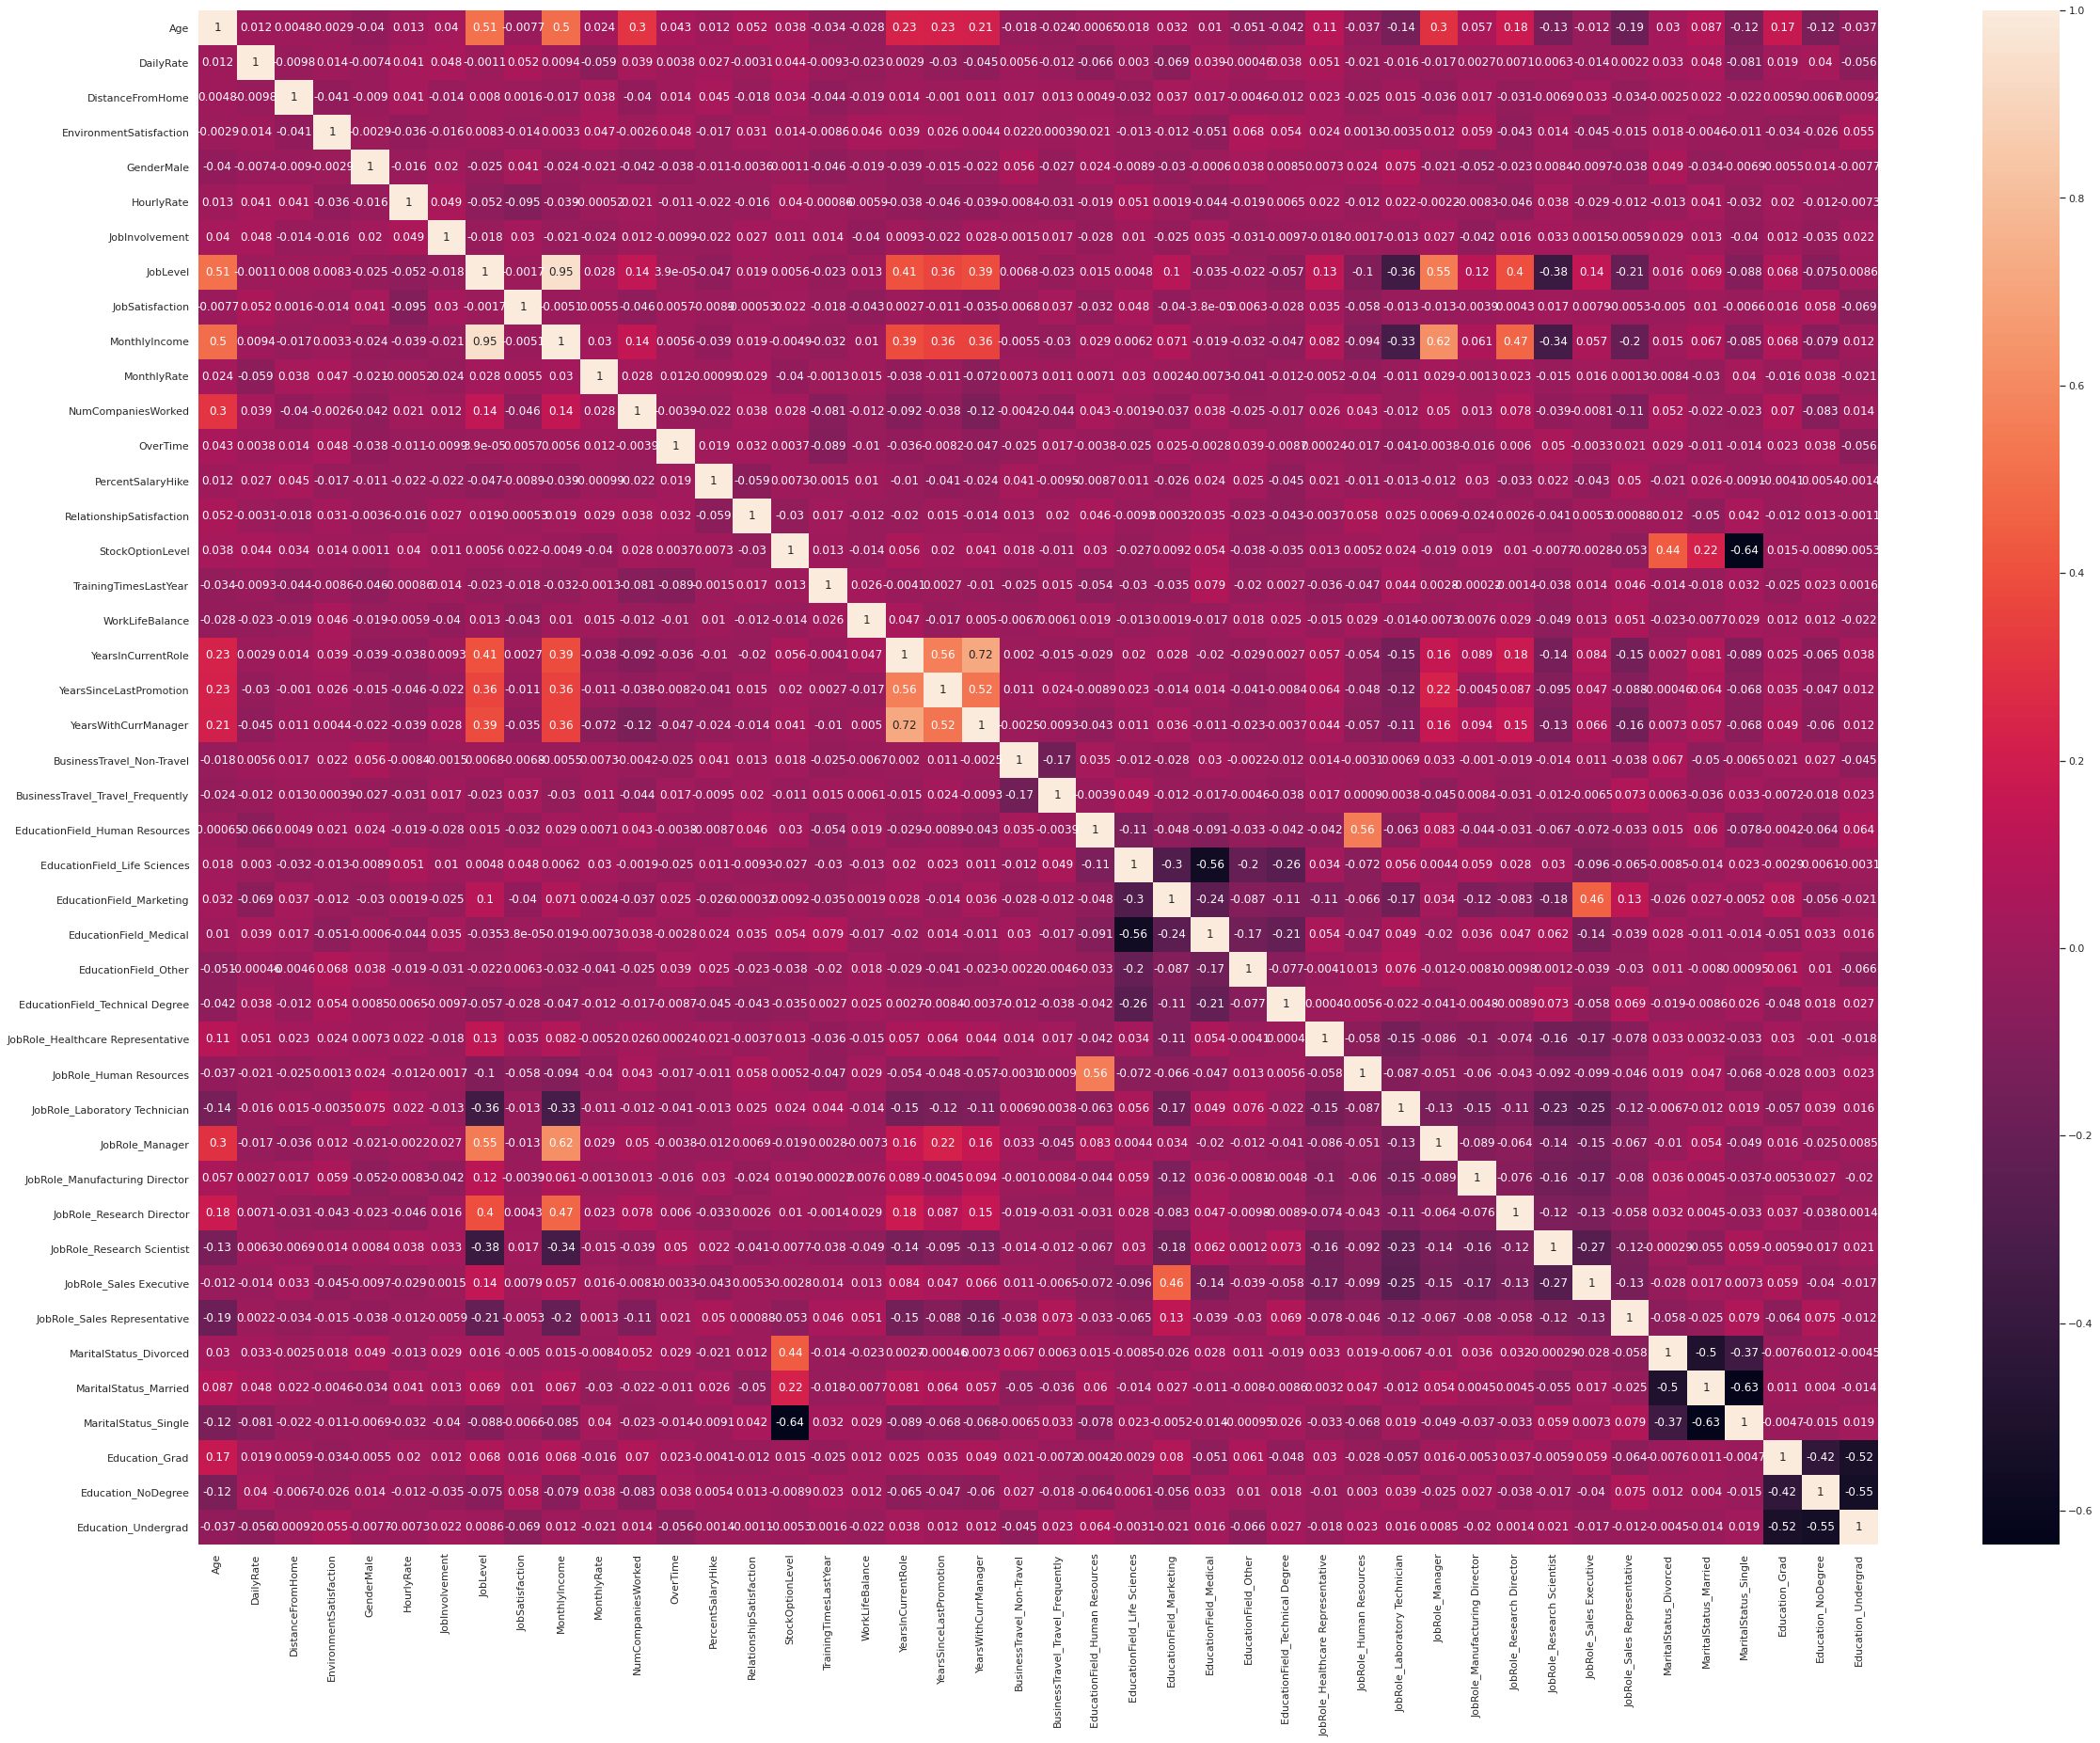

In [76]:
data_corr = data.drop(['Attrition'],axis=1)
corrMatrix = data_corr.corr()
sn.set(rc={'figure.figsize':(40,30)})
sn.set(font_scale=1)
sn.heatmap(corrMatrix, annot=True)
plt.show()

We can see that YearsInCurrentRole and YearsWithCurrentManager are highly correlated - we will want to eliminate one of these variables from our analysis.

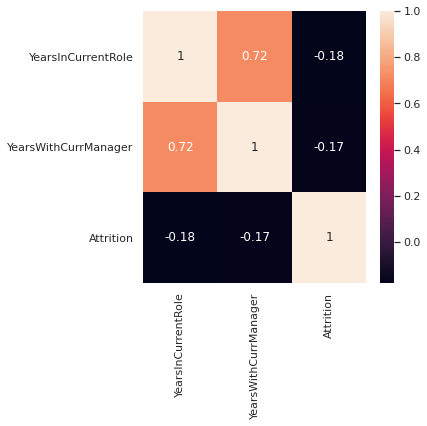

In [77]:
data_corr = data[['YearsInCurrentRole','YearsWithCurrManager','Attrition']]
corrMatrix = data_corr.corr()
sn.set(rc={'figure.figsize':(5,5)})
sn.set(font_scale=1)
sn.heatmap(corrMatrix, annot=True)
plt.show()

Let's drop years with current manager from our analysis. 

In [78]:
data = data.drop(columns=['YearsWithCurrManager'])

We notice that none of our variables meet the criteria to be eliminated at the moment, since the cut-off for strongly collinear variables is usually a correlation of less than -0.7 or higher than 0.7. 

However, we do see some moderately correlated variables that are still within our variable set - we will need to consider these carefully, and we may consider dropping more variables from our analysis later on. 

It is important to note that we are potentially introducing bias into our model by being so selective with our variables. 
However, since we intend to focus on inference, rather than prediction, it is ok to leverage our domain knowledge and insight to select certain variables and eliminate others. 

An example of where we can leverage our domain knowledge is in terms of the education variables. 
The question that many leaders ask is around which roles are associated with attrition, not the education of the individuals that are leaving.
Because there appears to be a moderate correlation between the education variables and the job role variables, we will choose to keep the job role variables.


In [79]:
data = data.drop(columns=['EducationField_Human Resources','EducationField_Life Sciences','EducationField_Marketing','EducationField_Medical','EducationField_Other','EducationField_Technical Degree','Education_Grad','Education_NoDegree','Education_Undergrad'])

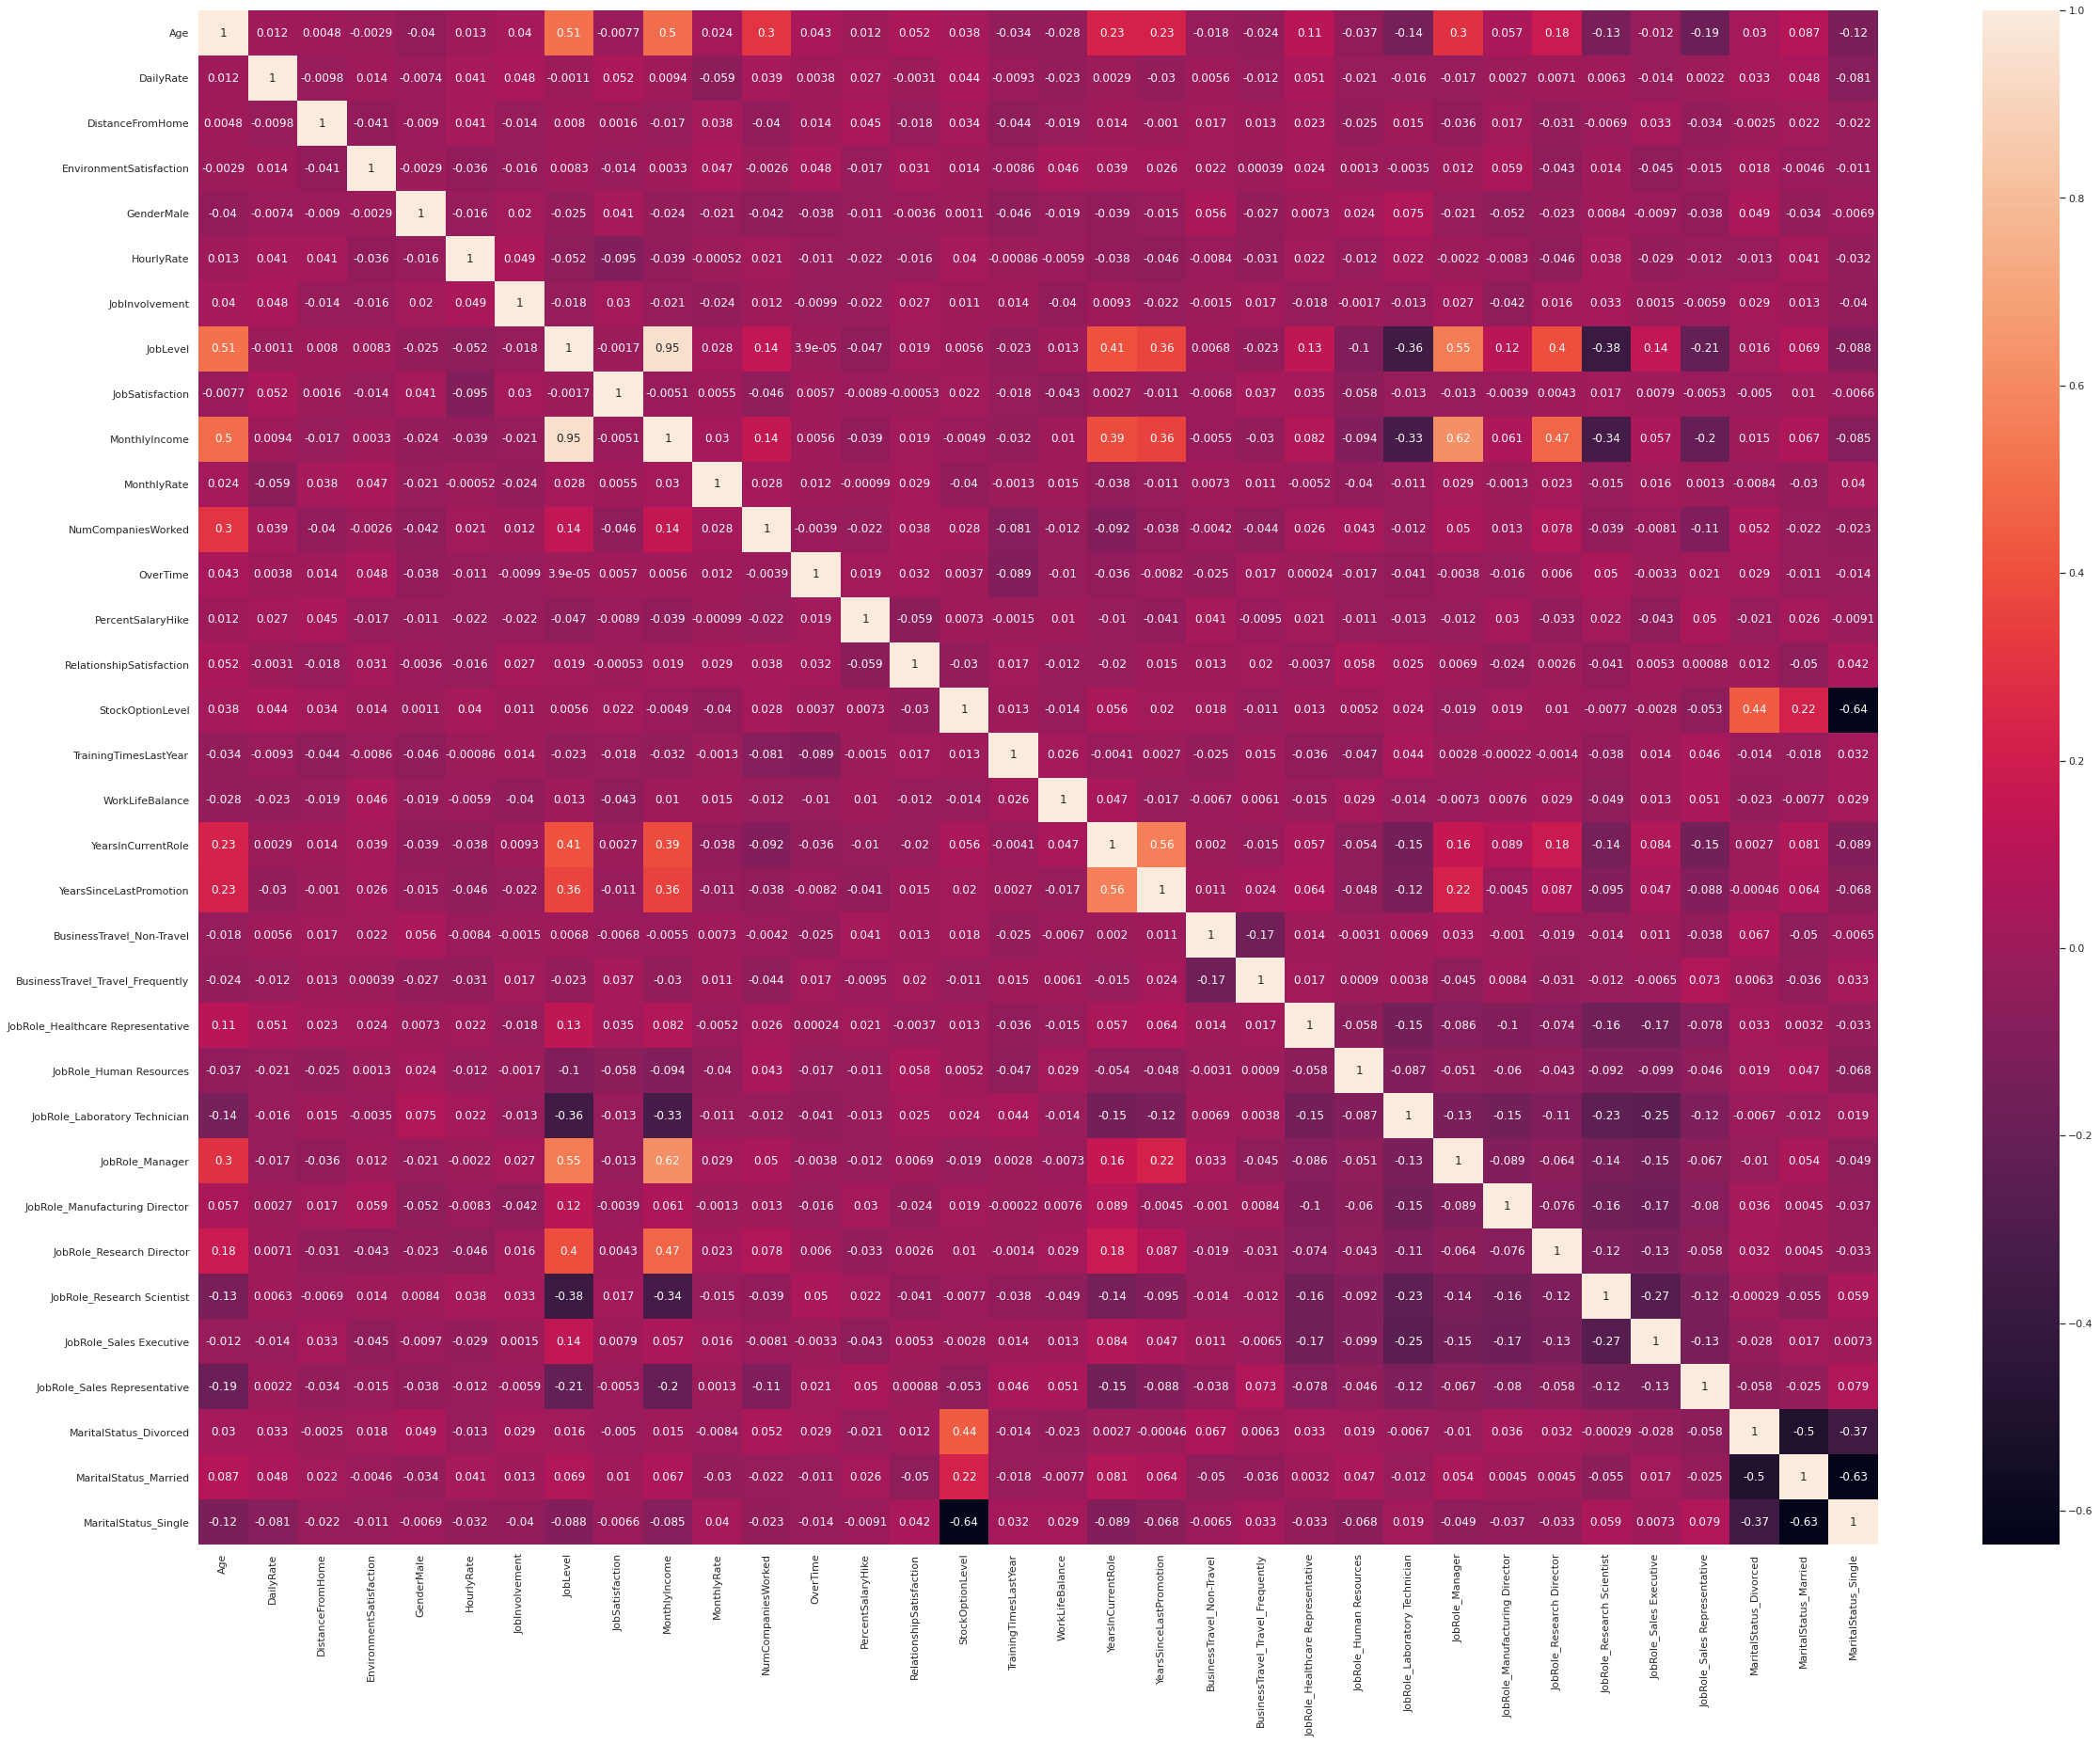

In [80]:
data_corr = data.drop(['Attrition'],axis=1)
corrMatrix = data_corr.corr()
sn.set(rc={'figure.figsize':(40,30)})
sn.set(font_scale=1)
sn.heatmap(corrMatrix, annot=True)
plt.show()


Another approach to reducing collinearity and unwanted variance is to use a variance inflation factor calculation, or VIF score, to evaluate factors that contribute the most to model variance.

In [81]:
data_corr = data.drop(['Attrition'],axis=1)

vif = pd.DataFrame()
vif["features"] = data_corr.columns
vif["vif_Factor"] = [variance_inflation_factor(data_corr.values, i) for i in range(data_corr.shape[1])]
vif

/opt/conda/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


features  vif_Factor
0                                 Age    1.542098
1                           DailyRate    1.027441
2                    DistanceFromHome    1.024132
3             EnvironmentSatisfaction    1.024127
4                          GenderMale    1.031646
5                          HourlyRate    1.033489
6                      JobInvolvement    1.030510
7                            JobLevel   13.517042
8                     JobSatisfaction    1.027825
9                       MonthlyIncome   17.514359
10                        MonthlyRate    1.019175
11                 NumCompaniesWorked    1.179092
12                           OverTime    1.025767
13                  PercentSalaryHike    1.024049
14           RelationshipSatisfaction    1.023429
15                   StockOptionLevel    1.877041
16              TrainingTimesLastYear    1.035434
17                    WorkLifeBalance    1.020820
18                 YearsInCurrentRole    1.687236
19            YearsSinceLastPromotion    1.570551
20          BusinessTravel_Non-Travel    1.049391
21   BusinessTravel_Travel_Frequently    1.047988
22  JobRole_Healthcare Representative         inf
23            JobRole_Human Resources         inf
24      JobRole_Laboratory Technician         inf
25                    JobRole_Manager         inf
26     JobRole_Manufacturing Director         inf
27          JobRole_Research Director         inf
28         JobRole_Research Scientist         inf
29            JobRole_Sales Executive         inf
30       JobRole_Sales Representative         inf
31             MaritalStatus_Divorced         inf
32              MaritalStatus_Married         inf
33               MaritalStatus_Single         inf

We will eliminate variables with a VIF score greater than 10. 

VIF scores of INF indicate perfect collinearity - we will need to eliminate further variables in order to resolve this issue.

In [82]:
data = data.drop(columns=['JobLevel','MonthlyIncome','JobRole_Healthcare Representative','JobRole_Human Resources','JobRole_Laboratory Technician','JobRole_Manager','JobRole_Manufacturing Director','JobRole_Research Director','JobRole_Research Scientist','JobRole_Sales Executive','JobRole_Sales Representative','MaritalStatus_Divorced','MaritalStatus_Married','MaritalStatus_Single'])

In [83]:
data_corr = data.drop(['Attrition'],axis=1)

vif = pd.DataFrame()
vif["features"] = data_corr.columns
vif["vif_Factor"] = [variance_inflation_factor(data_corr.values, i) for i in range(data_corr.shape[1])]
vif

features  vif_Factor
0                                Age   17.354529
1                          DailyRate    4.763552
2                   DistanceFromHome    2.310204
3            EnvironmentSatisfaction    2.519347
4                         GenderMale    2.417689
5                         HourlyRate    9.918847
6                     JobInvolvement    3.178140
7                    JobSatisfaction    2.572642
8                        MonthlyRate    4.720313
9                 NumCompaniesWorked    2.459689
10                          OverTime    1.420201
11                 PercentSalaryHike   13.920728
12          RelationshipSatisfaction    2.508663
13                  StockOptionLevel    1.893786
14             TrainingTimesLastYear    5.301056
15                   WorkLifeBalance    3.355617
16                YearsInCurrentRole    3.625335
17           YearsSinceLastPromotion    2.200238
18         BusinessTravel_Non-Travel    1.154054
19  BusinessTravel_Travel_Frequently    1.277656

As we've removed variables, we can see that there's additional variables that have poor VIF scores now. Let's eliminate those.

In [84]:
data = data.drop(columns=['Age','PercentSalaryHike'])

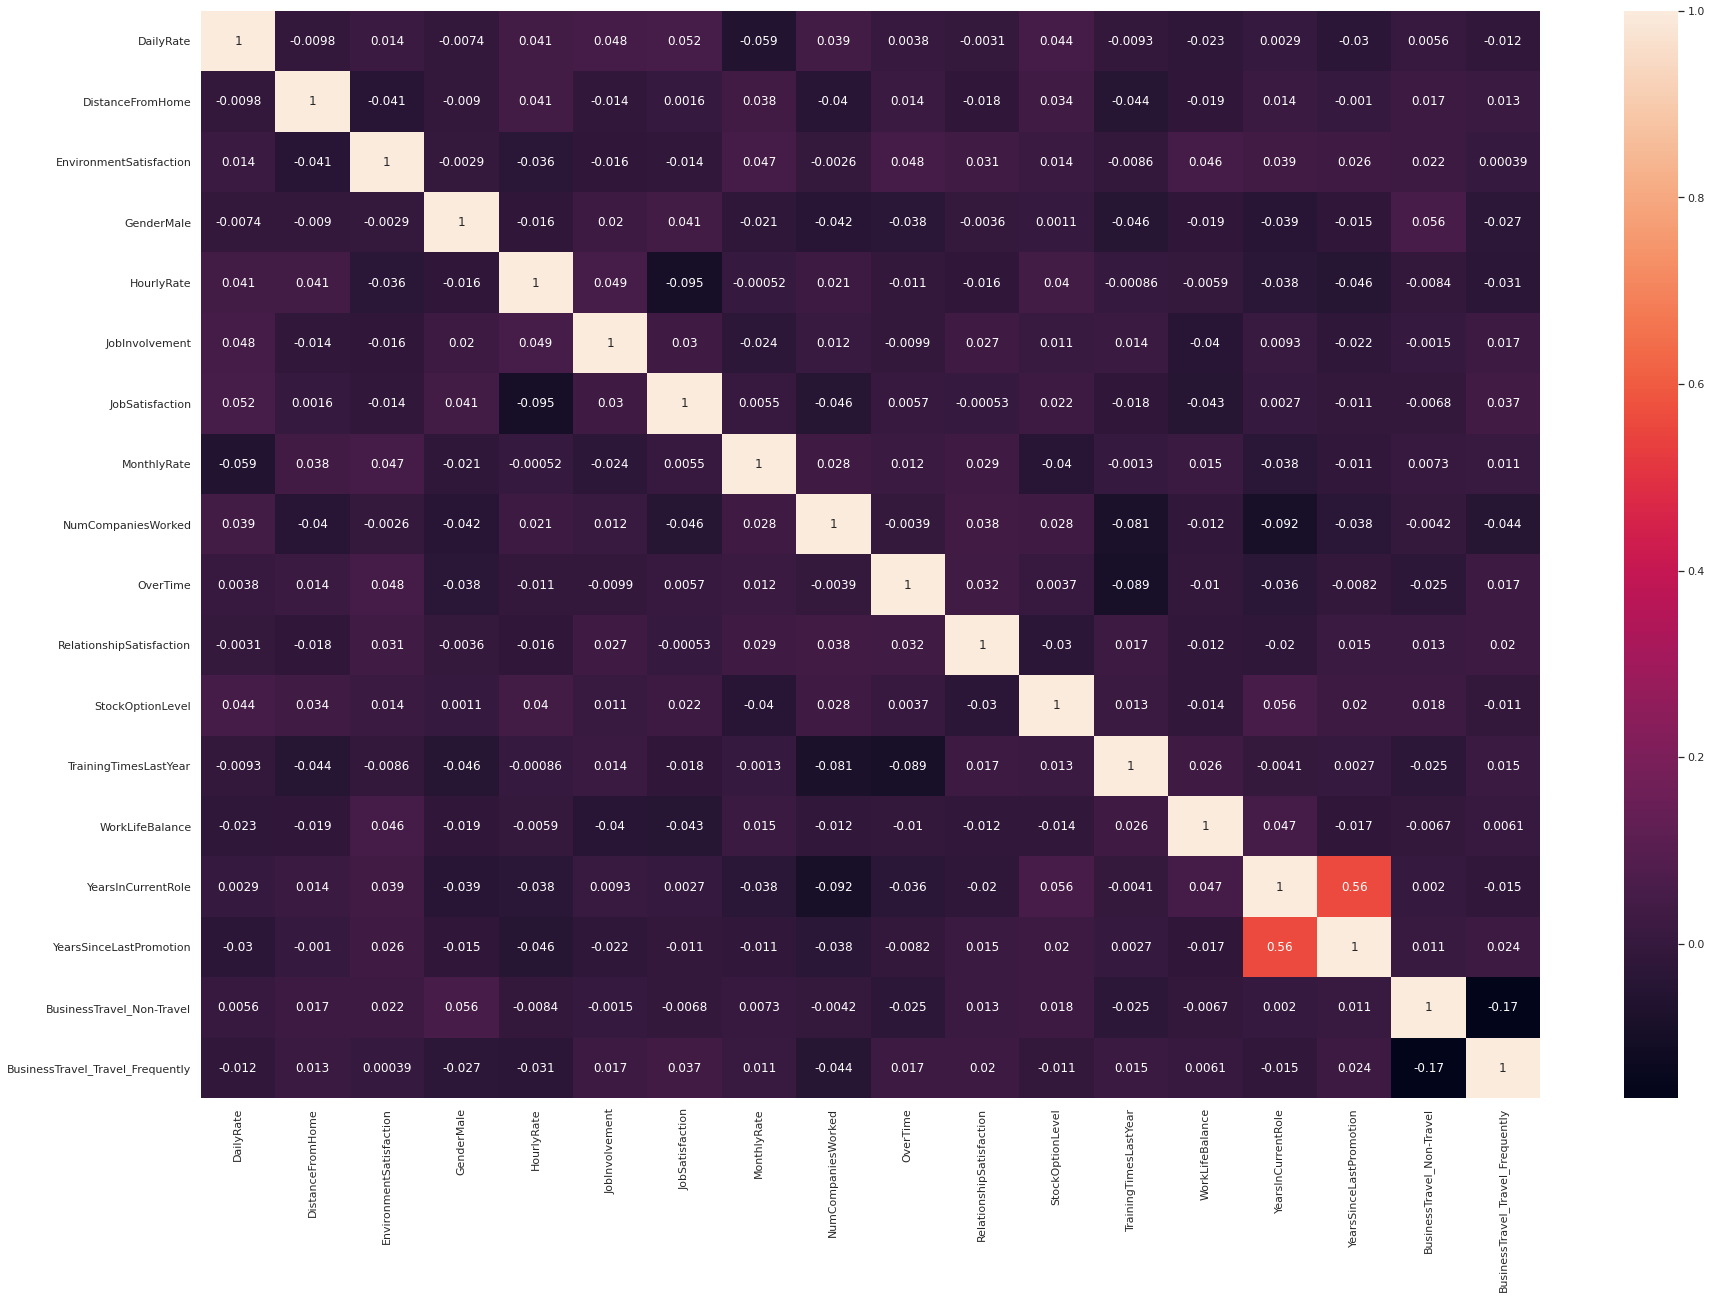

In [85]:
data_corr = data.drop(['Attrition'],axis=1)
corrMatrix = data_corr.corr()
sn.set(rc={'figure.figsize':(30,20)})
sn.set(font_scale=1)
sn.heatmap(corrMatrix, annot=True)
plt.show()

We can see clearly now that we have reduced collinearity significantly within our predictors. 
We note that there are still a few moderately correlated predictors: YearsInCurrentRole x YearsSinceLastPromotion, for example. 
We will not remove these variables now, since they do not meet the threshold to be classified as strongly correlated, but we note that this may introduce error into our model and may want to revisit these variables at a later time.

In [86]:
data_corr = data.drop(['Attrition'],axis=1)

vif = pd.DataFrame()
vif["features"] = data_corr.columns
vif["vif_Factor"] = [variance_inflation_factor(data_corr.values, i) for i in range(data_corr.shape[1])]
vif

features  vif_Factor
0                          DailyRate    4.569746
1                   DistanceFromHome    2.258476
2            EnvironmentSatisfaction    2.495881
3                         GenderMale    2.369850
4                         HourlyRate    8.674242
5                     JobInvolvement    3.119749
6                    JobSatisfaction    2.513688
7                        MonthlyRate    4.495065
8                 NumCompaniesWorked    2.095862
9                           OverTime    1.396780
10          RelationshipSatisfaction    2.471005
11                  StockOptionLevel    1.884016
12             TrainingTimesLastYear    4.964250
13                   WorkLifeBalance    3.269962
14                YearsInCurrentRole    3.443712
15           YearsSinceLastPromotion    2.160288
16         BusinessTravel_Non-Travel    1.148577
17  BusinessTravel_Travel_Frequently    1.274229

Now that we've eliminated variables that contribute to collinearity, we are ready to start selecting variables and fitting a model.

### Model - Logistic Regression

We will leverage logistic regression to model our data. 

We could explore more flexible models, but because the intent is for business leaders to understand attrition, and make decisions based on the outcomes, we will stick to simpler approaches, so that the models are easier to interpret and make sense of. 

Finally, we will of course have to consider the impact of real-world issues with measuring behavior in human subjects; it is usually impossible to find a perfect measure, so there will always be some error associated with our model, and we will need to find a way to capture this error and communicate it appropriately. 

#### Predictor Selection 

We still have far too many predictors to work with, a total of 18. 

There are a few ways we can narrow down our predictors.
We can leverage additional domain information, like what variables might be of interest to our business leaders. 
We can also utilize additional exploratory data analysis methods to see details about our variables that might help us narrow down the number we will include in our model. 

The first method we want to leverage is forward stepwise selection.

#### Approach - Forward Stepwise Refinement

Because we want to determine the variables that are most strongly predictive of attrition, we will use forward stepwise refinement to identify how many variables we can add to maximize our log-likelihood score.

We will need to rename a few of our predictors, since we want to use the statsmodels formula method - since it takes a string as input, we need to make sure we don't have any spaces or extra characters in our predictor names.

In [87]:
data = data.rename(columns={'BusinessTravel_Travel_Frequently':'BusTravelFreq'})
data = data.rename(columns={'BusinessTravel_Non-Travel':'BusTravelNon'})
allowed_factors = data.columns.values.tolist()
allowed_factors = allowed_factors[1:]
#print(allowed_factors)

In [88]:
#First step: create training data

import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm

train = np.random.choice(data.index,200)
train_data = data.loc[pd.Index(train)]

test = np.random.choice(data.index,200)
test_data = data.loc[pd.Index(train)]

In [89]:
#Second step: start creating the model

#p = 1
model_1 = smf.logit(formula='Attrition~DistanceFromHome',data=train_data).fit(maxiter=35,disp=0)
max_val = model_1.llf
best_item = 'DistanceFromHome'

for item in allowed_factors:
    string = 'Attrition~'
    string = string + item
    #print(item)
    model_1 = smf.logit(formula=string,data=train_data).fit(maxiter=100,disp=0)
    val = model_1.llf
    #print(val)
    if val > max_val:
        max_val = val
        best_item = item 

str_1 = 'Attrition~' + best_item 
model_fin = smf.logit(formula=str_1,data=train_data).fit(maxiter=35,disp=0)
val1 = model_fin.llf
print(best_item, ': ', val1)
    

OverTime :  -71.84074943105841


In [90]:
model_fin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                  200
Model:                          Logit   Df Residuals:                      198
Method:                           MLE   Df Model:                            1
Date:                Sat, 30 Apr 2022   Pseudo R-squ.:                  0.1322
Time:                        18:59:22   Log-Likelihood:                -71.841
converged:                       True   LL-Null:                       -82.787
Covariance Type:            nonrobust   LLR p-value:                 2.882e-06
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.6027      0.328     -7.942      0.000      -3.245      -1.960
OverTime       1.9636      0.433      4.531      0.000       1.114       2.813
==============================================================================
"""

We see that Environment Satisfaction was chosen as the best model with one predictor.
Let's try with two variables and see whether we can improve our model.

In [91]:
#p = 2
allowed_factors.remove(best_item)
str_add = 'Attrition~' + best_item + '+' + allowed_factors[0]
model_2 = smf.logit(formula=str_add,data=train_data).fit(maxiter=35,disp=0)
max_val2 = model_2.llf
best_item_2 = allowed_factors[0]

for item in allowed_factors:
    string = 'Attrition~' + best_item
    string = string + '+' + item
    #print(item)
    model_2 = smf.logit(formula=string,data=train_data).fit(maxiter=100,disp=0)
    val = model_2.llf
    #print(val)
    if val > max_val2:
        max_val2 = val
        best_item_2 = item 

str_2 = str_1 + '+' + best_item_2 
model_fin_2 = smf.logit(formula=str_2,data=train_data).fit(maxiter=35,disp=0)

val2 = model_fin_2.llf
print(best_item_2, ': ', val2)
    

StockOptionLevel :  -64.72428177357773


In [92]:
model_fin_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                  200
Model:                          Logit   Df Residuals:                      197
Method:                           MLE   Df Model:                            2
Date:                Sat, 30 Apr 2022   Pseudo R-squ.:                  0.2182
Time:                        18:59:22   Log-Likelihood:                -64.724
converged:                       True   LL-Null:                       -82.787
Covariance Type:            nonrobust   LLR p-value:                 1.430e-08
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.9919      0.352     -5.658      0.000      -2.682      -1.302
OverTime             2.1207      0.459      4.622      0.000       1.221       3.020
StockOptionLevel    -1.2494      0.396     -3.152      0.002      -2.026      -0.473
====================================================================================
"""

In [93]:
#p = 3
allowed_factors.remove(best_item_2)
str_add = 'Attrition~' + best_item + '+' + best_item_2 + '+' + allowed_factors[0] 
model_3 = smf.logit(formula=str_add,data=train_data).fit(maxiter=35,disp=0)
max_val3 = model_3.llf
best_item_3 = allowed_factors[0]

for item in allowed_factors:
    string = 'Attrition~' + best_item + '+' + best_item_2 + '+'+ item
    #print(item)
    model_3 = smf.logit(formula=string,data=train_data).fit(maxiter=100,disp=0)
    val = model_3.llf
    #print(val)
    if val > max_val3:
        max_val3 = val
        best_item_3 = item 

str_3 = str_2 + '+' + best_item_3 
model_fin_3 = smf.logit(formula=str_3,data=train_data).fit(maxiter=35,disp=0)
val3 = model_fin_3.llf
print(best_item_3, ': ', val3)
    

RelationshipSatisfaction :  -61.05174138254203


In [94]:
model_fin_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                  200
Model:                          Logit   Df Residuals:                      196
Method:                           MLE   Df Model:                            3
Date:                Sat, 30 Apr 2022   Pseudo R-squ.:                  0.2625
Time:                        18:59:24   Log-Likelihood:                -61.052
converged:                       True   LL-Null:                       -82.787
Covariance Type:            nonrobust   LLR p-value:                 1.954e-09
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -1.3187      0.416     -3.171      0.002      -2.134      -0.504
OverTime                     2.5974      0.529      4.906      0.000       1.560       3.635
StockOptionLevel            -1.5291      0.453     -3.374      0.001      -2.417      -0.641
RelationshipSatisfaction    -1.3901      0.537     -2.588      0.010      -2.443      -0.337
============================================================================================
"""

In [95]:
#p = 4
allowed_factors.remove(best_item_3)
str_add = 'Attrition~' + best_item + '+' + best_item_2 + '+' + best_item_3 + '+' + allowed_factors[0]
model_4 = smf.logit(formula=str_add,data=train_data).fit(maxiter=35,disp=0)
max_val4 = model_4.llf
best_item_4 = allowed_factors[0]

for item in allowed_factors:
    string = 'Attrition~' + best_item + '+' + best_item_2 + '+' + best_item_3 + '+' + item
    #print(item)
    model_4 = smf.logit(formula=string,data=train_data).fit(maxiter=100,disp=0)
    val = model_4.llf
    #print(val)
    if val > max_val4:
        max_val4 = val
        best_item_4 = item 

str_4 = str_3 + '+' + best_item_4
model_fin_4 = smf.logit(formula=str_4,data=train_data).fit(maxiter=35,disp=0)
val4 = model_fin_4.llf
print(best_item_4, ': ', val4)

YearsInCurrentRole :  -59.83348506884938


In [96]:
model_fin_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                  200
Model:                          Logit   Df Residuals:                      195
Method:                           MLE   Df Model:                            4
Date:                Sat, 30 Apr 2022   Pseudo R-squ.:                  0.2773
Time:                        18:59:25   Log-Likelihood:                -59.833
converged:                       True   LL-Null:                       -82.787
Covariance Type:            nonrobust   LLR p-value:                 2.574e-09
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -0.9866      0.460     -2.145      0.032      -1.888      -0.085
OverTime                     2.5927      0.541      4.789      0.000       1.532       3.654
StockOptionLevel            -1.4021      0.447     -3.139      0.002      -2.278      -0.527
RelationshipSatisfaction    -1.3602      0.543     -2.504      0.012      -2.425      -0.295
YearsInCurrentRole          -0.1171      0.079     -1.484      0.138      -0.272       0.038
============================================================================================
"""

Based on the p-values of the intercepts, we can see that our model improves as we add more features. 
However, with a pseudo-r squared value of around 0.2, we are still not creating a model that is a good fit to our data.

It is possible that we are missing some interaction effects - let's see if we can improve our model by investingating interaction effects.

In [97]:
model_1 = smf.logit(formula='Attrition~YearsInCurrentRole*JobInvolvement+YearsInCurrentRole+JobInvolvement',data=train_data).fit(maxiter=35,disp=0)
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                  200
Model:                          Logit   Df Residuals:                      196
Method:                           MLE   Df Model:                            3
Date:                Sat, 30 Apr 2022   Pseudo R-squ.:                 0.04089
Time:                        18:59:25   Log-Likelihood:                -79.402
converged:                       True   LL-Null:                       -82.787
Covariance Type:            nonrobust   LLR p-value:                   0.07960
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -1.0900      0.514     -2.122      0.034      -2.097      -0.083
YearsInCurrentRole                   -0.2433      0.152     -1.600      0.110      -0.541       0.055
JobInvolvement                       -0.1852      0.624     -0.297      0.766      -1.408       1.037
YearsInCurrentRole:JobInvolvement     0.1156      0.173      0.669      0.503      -0.223       0.454
=====================================================================================================
"""

In [98]:
model_1 = smf.logit(formula='Attrition~YearsInCurrentRole*BusTravelFreq+YearsInCurrentRole+BusTravelFreq',data=train_data).fit(maxiter=35)
model_1.summary()

Optimization terminated successfully.
         Current function value: 0.394435
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                  200
Model:                          Logit   Df Residuals:                      196
Method:                           MLE   Df Model:                            3
Date:                Sat, 30 Apr 2022   Pseudo R-squ.:                 0.04711
Time:                        18:59:25   Log-Likelihood:                -78.887
converged:                       True   LL-Null:                       -82.787
Covariance Type:            nonrobust   LLR p-value:                   0.05031
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                           -1.3655      0.349     -3.908      0.000      -2.050      -0.681
YearsInCurrentRole                  -0.1618      0.087     -1.868      0.062      -0.332       0.008
BusTravelFreq                        0.5588      0.638      0.875      0.381      -0.692       1.810
YearsInCurrentRole:BusTravelFreq     0.0016      0.153      0.011      0.992      -0.298       0.301
====================================================================================================
"""

In [99]:
model_1 = smf.logit(formula='Attrition~BusTravelFreq * JobInvolvement + BusTravelFreq+JobInvolvement',data=train_data).fit(maxiter=35)
model_1.summary()

Optimization terminated successfully.
         Current function value: 0.405470
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                  200
Model:                          Logit   Df Residuals:                      196
Method:                           MLE   Df Model:                            3
Date:                Sat, 30 Apr 2022   Pseudo R-squ.:                 0.02045
Time:                        18:59:25   Log-Likelihood:                -81.094
converged:                       True   LL-Null:                       -82.787
Covariance Type:            nonrobust   LLR p-value:                    0.3358
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -1.7430      0.410     -4.254      0.000      -2.546      -0.940
BusTravelFreq                   -0.6549      1.122     -0.584      0.559      -2.854       1.544
JobInvolvement                  -0.2830      0.512     -0.553      0.580      -1.287       0.721
BusTravelFreq:JobInvolvement     1.5108      1.224      1.234      0.217      -0.889       3.910
================================================================================================
"""

We can try to add quadratic terms, to see if we can improve our model. 
However, it is clear that we are not able to improve fit by adding interaction terms.

In [100]:
model_1 = smf.logit(formula='Attrition~YearsInCurrentRole^2',data=train_data).fit(maxiter=35)
model_1.summary()

Optimization terminated successfully.
         Current function value: 0.410178
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                  200
Model:                          Logit   Df Residuals:                      198
Method:                           MLE   Df Model:                            1
Date:                Sat, 30 Apr 2022   Pseudo R-squ.:                0.009082
Time:                        18:59:25   Log-Likelihood:                -82.036
converged:                       True   LL-Null:                       -82.787
Covariance Type:            nonrobust   LLR p-value:                    0.2201
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -1.5436      0.269     -5.735      0.000      -2.071      -1.016
YearsInCurrentRole ^ 2    -0.0677      0.058     -1.165      0.244      -0.182       0.046
==========================================================================================
"""

Despite investigating interaction effects, we are still not generating a very good fit to our data. 

However, we do gain valuable information from the coefficients that can help us infer some information about attrition and our data. 

If we are looking to perform better on predicting outcomes, we can explore non-parametric methods, like k-nearest neighbors.

We can also leverage a different approach to variable selection, to see if we can create a better model.

#### Domain Knowledge - Variable Selection

We have not been successful in modeling attrition using variable selection methods like forwards stepwise selection. 

But because our goal is to provide inference about what variables are associated with attrition, we can also use our domain knowledge and try modeling with a few features of interest to our leaders.

A common trend is that individuals with less tenure or less experience tend to leave more often than those that have more tenure / more experience. 
Let's try modeling attrition with variables that capture tenure, experience and age, to see whether these predictors are strongly associated with attrition.

This is an effort to optimize for inference, rather than prediction, so we accept the bias and variance that might result from selecting variables based on domain knowledge and hypotheses, rather than selecting the features that are most strongly associated with a higher prediction accuracy.

In [101]:
train_age = np.random.choice(data2.index,200)
train_data_age = data2.loc[pd.Index(train)]

test_age = np.random.choice(data2.index,200)
test_data_age = data2.loc[pd.Index(train)]

In [102]:
model_1 = smf.logit(formula='Attrition~Age',data=train_data_age).fit(maxiter=35)
model_1.summary()

Optimization terminated successfully.
         Current function value: 0.407667
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                  200
Model:                          Logit   Df Residuals:                      198
Method:                           MLE   Df Model:                            1
Date:                Sat, 30 Apr 2022   Pseudo R-squ.:                 0.01515
Time:                        18:59:25   Log-Likelihood:                -81.533
converged:                       True   LL-Null:                       -82.787
Covariance Type:            nonrobust   LLR p-value:                    0.1133
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4360      0.864     -0.504      0.614      -2.130       1.258
Age           -0.0370      0.024     -1.549      0.121      -0.084       0.010
==============================================================================
"""

In [103]:
model_1 = smf.logit(formula='Attrition~JobLevel', data = train_data_age).fit(maxiter=35)
model_1.summary()

Optimization terminated successfully.
         Current function value: 0.398582
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                  200
Model:                          Logit   Df Residuals:                      198
Method:                           MLE   Df Model:                            1
Date:                Sat, 30 Apr 2022   Pseudo R-squ.:                 0.03709
Time:                        18:59:26   Log-Likelihood:                -79.716
converged:                       True   LL-Null:                       -82.787
Covariance Type:            nonrobust   LLR p-value:                   0.01320
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7343      0.461     -1.593      0.111      -1.638       0.169
JobLevel      -0.5216      0.228     -2.288      0.022      -0.968      -0.075
==============================================================================
"""

In [104]:
model_1 = smf.logit(formula='Attrition~JobLevel + Age', data = train_data_age).fit(maxiter=35)
model_1.summary()

Optimization terminated successfully.
         Current function value: 0.398240
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                  200
Model:                          Logit   Df Residuals:                      197
Method:                           MLE   Df Model:                            2
Date:                Sat, 30 Apr 2022   Pseudo R-squ.:                 0.03792
Time:                        18:59:26   Log-Likelihood:                -79.648
converged:                       True   LL-Null:                       -82.787
Covariance Type:            nonrobust   LLR p-value:                   0.04331
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4606      0.872     -0.528      0.597      -2.169       1.248
JobLevel      -0.4797      0.255     -1.878      0.060      -0.980       0.021
Age           -0.0099      0.027     -0.368      0.713      -0.063       0.043
==============================================================================
"""

In [105]:
model_1 = smf.logit(formula='Attrition~JobLevel * Age + JobLevel+Age', data = train_data_age).fit(maxiter=35)
model_1.summary()

Optimization terminated successfully.
         Current function value: 0.388354
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                  200
Model:                          Logit   Df Residuals:                      196
Method:                           MLE   Df Model:                            3
Date:                Sat, 30 Apr 2022   Pseudo R-squ.:                 0.06180
Time:                        18:59:26   Log-Likelihood:                -77.671
converged:                       True   LL-Null:                       -82.787
Covariance Type:            nonrobust   LLR p-value:                   0.01669
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.7984      1.815      1.542      0.123      -0.759       6.356
JobLevel        -2.4698      1.047     -2.359      0.018      -4.521      -0.418
Age             -0.0926      0.049     -1.897      0.058      -0.188       0.003
JobLevel:Age     0.0477      0.023      2.032      0.042       0.002       0.094
================================================================================
"""

We can see that investigating age and job level predictors does not yield a good classifier - therefore, we would likely share with leaders that there are potentially other more significant factors we could consider, and that the relationship is not as simple as Attrition~Age

Let's investigate another question that is commonly asked, to see if we find any helpful information about features of interest. 

It is a common result that employees who are less engaged, and less happy are more likely to leave. 

Let's see if this is true for our dataset.

In [106]:
train_sat = np.random.choice(data2.index,200)
train_data_sat = data2.loc[pd.Index(train)]

test_sat = np.random.choice(data2.index,200)
test_data_sat = data2.loc[pd.Index(train)]

In [107]:
model_1 = smf.logit(formula='Attrition~RelationshipSatisfaction', data = train_data_age).fit(maxiter=35)
model_1.summary()

Optimization terminated successfully.
         Current function value: 0.413155
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                  200
Model:                          Logit   Df Residuals:                      198
Method:                           MLE   Df Model:                            1
Date:                Sat, 30 Apr 2022   Pseudo R-squ.:                0.001890
Time:                        18:59:26   Log-Likelihood:                -82.631
converged:                       True   LL-Null:                       -82.787
Covariance Type:            nonrobust   LLR p-value:                    0.5758
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -1.6514      0.292     -5.660      0.000      -2.223      -1.080
RelationshipSatisfaction    -0.2255      0.402     -0.560      0.575      -1.014       0.563
============================================================================================
"""

In [108]:
model_1 = smf.logit(formula='Attrition~JobInvolvement', data = train_data_age).fit(maxiter=35)
model_1.summary()

Optimization terminated successfully.
         Current function value: 0.413786
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                  200
Model:                          Logit   Df Residuals:                      198
Method:                           MLE   Df Model:                            1
Date:                Sat, 30 Apr 2022   Pseudo R-squ.:               0.0003647
Time:                        18:59:26   Log-Likelihood:                -82.757
converged:                       True   LL-Null:                       -82.787
Covariance Type:            nonrobust   LLR p-value:                    0.8059
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.8524      0.380     -4.871      0.000      -2.598      -1.107
JobInvolvement     0.1094      0.448      0.244      0.807      -0.768       0.987
==================================================================================
"""

In [109]:
model_1 = smf.logit(formula='Attrition~EnvironmentSatisfaction', data = train_data_age).fit(maxiter=35)
model_1.summary()

Optimization terminated successfully.
         Current function value: 0.413427
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                  200
Model:                          Logit   Df Residuals:                      198
Method:                           MLE   Df Model:                            1
Date:                Sat, 30 Apr 2022   Pseudo R-squ.:                0.001232
Time:                        18:59:26   Log-Likelihood:                -82.685
converged:                       True   LL-Null:                       -82.787
Covariance Type:            nonrobust   LLR p-value:                    0.6515
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -1.6692      0.302     -5.521      0.000      -2.262      -1.077
EnvironmentSatisfaction    -0.1832      0.405     -0.453      0.651      -0.976       0.610
===========================================================================================
"""

In [110]:
model_1 = smf.logit(formula='Attrition~WorkLifeBalance', data = train_data_age).fit(maxiter=35)
model_1.summary()

Optimization terminated successfully.
         Current function value: 0.413254
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                  200
Model:                          Logit   Df Residuals:                      198
Method:                           MLE   Df Model:                            1
Date:                Sat, 30 Apr 2022   Pseudo R-squ.:                0.001651
Time:                        18:59:26   Log-Likelihood:                -82.651
converged:                       True   LL-Null:                       -82.787
Covariance Type:            nonrobust   LLR p-value:                    0.6010
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -1.6094      0.365     -4.408      0.000      -2.325      -0.894
WorkLifeBalance    -0.2311      0.437     -0.528      0.597      -1.088       0.626
===================================================================================
"""

It appears that any of these variables on their own is not a strong predictor of attrition. 
Let's investigate interaction effects, to see if we can create a stronger model.

In [113]:
model_1 = smf.logit(formula='Attrition~WorkLifeBalance*EnvironmentSatisfaction+WorkLifeBalance+EnvironmentSatisfaction', data = train_data_age).fit(maxiter=35)
model_1.summary()

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.4128773157382838
            Iterations: 28
            Function evaluations: 28
            Gradient evaluations: 28


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                  200
Model:                          Logit   Df Residuals:                      196
Method:                           MLE   Df Model:                            3
Date:                Sat, 30 Apr 2022   Pseudo R-squ.:                0.002560
Time:                        19:17:24   Log-Likelihood:                -82.575
converged:                       True   LL-Null:                       -82.787
Covariance Type:            nonrobust   LLR p-value:                    0.9353
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                  -1.5686      0.492     -3.191      0.001      -2.532      -0.605
WorkLifeBalance                            -0.1586      0.624     -0.254      0.799      -1.381       1.064
EnvironmentSatisfaction                    -0.0896      0.734     -0.122      0.903      -1.529       1.350
WorkLifeBalance:EnvironmentSatisfaction    -0.0927      0.884     -0.105      0.916      -1.826       1.641
===========================================================================================================
"""

In [112]:
model_1 = smf.logit(formula='Attrition~WorkLifeBalance*JobInvolvement+JobInvolvement+WorkLifeBalance', data = train_data_age).fit(maxiter=35)
model_1.summary()

Optimization terminated successfully.
         Current function value: 0.411561
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                  200
Model:                          Logit   Df Residuals:                      196
Method:                           MLE   Df Model:                            3
Date:                Sat, 30 Apr 2022   Pseudo R-squ.:                0.005740
Time:                        18:59:27   Log-Likelihood:                -82.312
converged:                       True   LL-Null:                       -82.787
Covariance Type:            nonrobust   LLR p-value:                    0.8133
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         -2.0794      0.750     -2.773      0.006      -3.549      -0.609
WorkLifeBalance                    0.3159      0.870      0.363      0.717      -1.390       2.022
JobInvolvement                     0.6581      0.860      0.765      0.444      -1.028       2.344
WorkLifeBalance:JobInvolvement    -0.7663      1.009     -0.760      0.447      -2.743       1.211
==================================================================================================
"""

We are clearly unable to create a good fit to our data, which suggests one of two things: 
1. These variables are not good predictors of attrition for our dataset (bias)
2. The decision boundary for our classifier is highly non-linear, and trying to use a simple model like logistic regression analysis will not yield good results. (variance)

Because we have strong domain knowledge that suggests the variables that we've investigated so far should be strongly associated with attrition, we will explore leveraging a K Nearest Neighbors approach in the future, so that we can create a more accurate prediction. 

Our results also tell us something that businesses already know - attrition is usually not as simple as paying someone more, or keeping them engaged - it is a highly personal, flexible combination of factors that are associated with attrition, and a simple logistic regression model is unlikely to capture the complexity of this problem.

Let's see if we can confirm our suspicion about the decision boundary by leveraging a k-nearest neighbors approach, and see whether we get better fit to our data.

Because we have such a large number of predictors, we will limit ourselves to only 2 or 3 in our K-Nearest Neighbors approach, so that we can avoid the curse of dimensionality that occurs with this non-parametric model approach.

### K-Nearest Neighbors

Because of what we've seen earlier, let's use some of the variables that we know to be better associated with attrition. 

Variables of interest:
OverTime
JobInvolvement
YearsInCurrentRole

In [ ]:
data_knn = data2[['Attrition','OverTime','JobInvolvement','YearsInCurrentRole']]
data_x = 

train_knn = np.random.choice(data2.index,200)
train_data_knn = data2.loc[pd.Index(train)]

test_knn = np.random.choice(data2.index,200)
test_data_knn = data2.loc[pd.Index(train)]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

model.fit(